This notebook contains familiarization of Pre-owned Condominiums,etc real estate data of Japan. Data quality issues, feature engineering opportunities and any other notable observations regarding data preprocessing that was done previously has been **re-explored and changed**. In addition, Exploratory Data Analysis (EDA) has been conducted to describe relationships between different variables and Trade price.

**Author: Aditi Namboodiripad**

**Date: 19/9/2023**

# Real estate dataset of Pre-owned Condominiums and others

## Table Of Contents

1. [Data Dictionary](#Data_Dictionary) <br>
2. [Basic Analysis](#Basic-Analysis) <br>
3. [Dealing with nulls](#Dealing-with-nulls)<br>
4. [Dealing with Duplicates](#Dealing-with-Duplicates)<br>
5. [Further Data Cleaning](#Further-Data-Cleaning)<br>
6. [Analyzing Patterns](#Analyzing_Patterns)<br>
7. [Basic Modelling](#Basic_Modelling)<br>
   - [Linear Regression](#Basic_Modelling)<br>
   - [Random Forest Regressor](#Basic_Modelling)<br>

8. [Summary](#Summary)<br>


# Data Dictionary

1. **Type:** Real Estate Type (e.g., Residential Land, Agricultural Land, Condominiums).
2. **Region:** Characteristics of surrounding areas (e.g., Residential Area, Commercial Area).
3. **MunicipalityCode:** City code of Japan.
4. **Prefecture:** Prefecture name of Japan.
5. **Municipality:** City name.
6. **DistrictName:** District name.
7. **NearestStation:** Nearest station name.
8. **TimeToNearestStation:** Time to the nearest station (in minutes).
9. **TradePrice:** Transaction prices in Japanese Yen.
10. **FloorPlan:** Property floor plan (e.g., 3LDK, 2DK).
11. **Area:** Surveyed area in square meters.
12. **UnitPrice:** Unit Land Price (Yen) per square meter.
13. **PricePerTsubo:** Unit Land Price (Yen) per Tsubo.
14. **Frontage:** Frontage in meters.
15. **BuildingYear:** Construction year of the building.
16. **PrewarBuilding:** Buildings built before 1945.
17. **Structure:** Building structure (e.g., Steel frame reinforced concrete, Wooden).
18. **Use:** Current property usage (e.g., House, Office, Factory).
19. **Purpose:** Purpose of future use (e.g., House, Shop, Office).
20. **Direction:** Frontage road direction.
21. **Classification:** Frontage road classification (e.g., City Road, National Highway).
22. **Breadth:** Frontage road breadth in meters.
23. **CityPlanning:** Use districts designated by the City Planning Act.
24. **CoverageRatio:** Maximum Building Coverage Ratio (%).
25. **FloorAreaRatio:** Maximum Floor-area Ratio (%).
26. **Period:** Time of transaction.
27. **Year:** Time of transaction year.
28. **Quarter:** Time of transaction year-quarter.
29. **Renovation:** Renovation status.
30. **Remarks:** Additional notes and remarks.


# Basic Analysis

Import all libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import f_oneway
from scipy import stats
import random
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Reading the csv and setting max columns and rows that are to be displayed

In [2]:
df=pd.read_csv("Pre-owned Condominiums, etc..csv")
pd.options.display.max_columns=4000
pd.options.display.max_rows = 999

Now lets check the first and last few rows

In [3]:
df.head()

,No,RealEstateType,SurroundingArea,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,UnitLandPricePerM2Yen,UnitLandPricePerTsuboYen,LandShape,FrontageM,FrontageIsGreaterFlag,TotalFloorAreaM2,TotalFloorAreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,FrontageRoadDirection,FrontageRoadClassification,FrontageRoadBreadthM,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,NaN,NaN,NaN,NaN,False,NaN,0,1997.0,0,RC,NaN,House,NaN,NaN,NaN,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
1,10,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,NaN,NaN,NaN,NaN,False,NaN,0,1989.0,0,RC,House,House,NaN,NaN,NaN,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
2,14,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,2002.0,0,RC,House,NaN,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,2nd quarter 2010,2010,2,Not yet,NaN
3,20,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,NaN,NaN,NaN,NaN,False,NaN,0,2002.0,0,NaN,House,NaN,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
4,25,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,NaN,NaN,NaN,NaN,False,NaN,0,1997.0,0,RC,House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st quarter 2011,2011,1,Not yet,NaN


In [4]:
df.tail()

,No,RealEstateType,SurroundingArea,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,UnitLandPricePerM2Yen,UnitLandPricePerTsuboYen,LandShape,FrontageM,FrontageIsGreaterFlag,TotalFloorAreaM2,TotalFloorAreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,FrontageRoadDirection,FrontageRoadClassification,FrontageRoadBreadthM,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
617854,29892,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Tobaru,NaN,NaN,NaN,NaN,5800000,3LDK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,1985.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,NaN,NaN,2nd quarter 2008,2008,2,Not yet,NaN
617855,29921,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Aza Hiyagon,NaN,NaN,NaN,NaN,5000000,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,1984.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,70.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
617856,29959,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Miyazato,NaN,NaN,NaN,NaN,6500000,4LDK,85,0,NaN,NaN,NaN,NaN,False,NaN,0,2001.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,70.0,200.0,4th quarter 2008,2008,4,Not yet,Dealings in which auction or arbiter participates
617857,29997,"Pre-owned Condominiums, etc.",NaN,47211,Okinawa Prefecture,Okinawa City,Yamazato,NaN,NaN,NaN,NaN,7000000,3DK,55,0,NaN,NaN,NaN,NaN,False,NaN,0,1991.0,0,RC,House,NaN,NaN,NaN,NaN,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2008,2008,1,Not yet,Dealings in which auction or arbiter participates
617858,30381,"Pre-owned Condominiums, etc.",NaN,47213,Okinawa Prefecture,Uruma City,Aza Kawasaki,NaN,NaN,NaN,NaN,4900000,2LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,1986.0,0,RC,House,NaN,NaN,NaN,NaN,Non-divided City Planning Area,60.0,200.0,4th quarter 2007,2007,4,Not yet,Dealings in which auction or arbiter participates


Let us check a sample of rows

In [5]:
df.sample(50)

,No,RealEstateType,SurroundingArea,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,UnitLandPricePerM2Yen,UnitLandPricePerTsuboYen,LandShape,FrontageM,FrontageIsGreaterFlag,TotalFloorAreaM2,TotalFloorAreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,FrontageRoadDirection,FrontageRoadClassification,FrontageRoadBreadthM,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
166717,74644,"Pre-owned Condominiums, etc.",NaN,13106,Tokyo,Taito Ward,Kotobuki,Kuramae,1,1.0,1.0,65000000,2DK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,2003.0,0,SRC,House,NaN,NaN,NaN,NaN,Commercial Zone,80.0,600.0,1st quarter 2012,2012,1,Not yet,NaN
559644,18033,"Pre-owned Condominiums, etc.",NaN,29203,Nara Prefecture,Yamatokoriyama City,Yanagimachi,Koriyama (Nara),9,9.0,9.0,11000000,3LDK,70,0,NaN,NaN,NaN,NaN,False,NaN,0,1998.0,0,RC,House,NaN,NaN,NaN,NaN,Commercial Zone,80.0,400.0,2nd quarter 2010,2010,2,Not yet,NaN
100276,88903,"Pre-owned Condominiums, etc.",NaN,12204,Chiba Prefecture,Funabashi City,Yakuendai,Narashino,1,1.0,1.0,18000000,4LDK,80,0,NaN,NaN,NaN,NaN,False,NaN,0,1998.0,0,RC,House,NaN,NaN,NaN,NaN,Category I Residential Zone,60.0,200.0,1st quarter 2009,2009,1,Done,NaN
96320,69191,"Pre-owned Condominiums, etc.",NaN,12203,Chiba Prefecture,Ichikawa City,Minamiono,Ichikawaono,20,20.0,20.0,13000000,2LDK,65,0,NaN,NaN,NaN,NaN,False,NaN,0,1987.0,0,RC,House,NaN,NaN,NaN,NaN,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2009,2009,4,Not yet,NaN
380067,256194,"Pre-owned Condominiums, etc.",NaN,14134,Kanagawa Prefecture,"Takatsu Ward,Kawasaki City",Hisamoto,Musashimizonokuchi,NaN,NaN,NaN,40000000,3LDK,65,0,NaN,NaN,NaN,NaN,False,NaN,0,2005.0,0,NaN,House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3rd quarter 2005,2005,3,Not yet,NaN
542748,92104,"Pre-owned Condominiums, etc.",NaN,28108,Hyogo Prefecture,"Tarumi Ward,Kobe City",Kasumigaoka,Kasumigaoka (Hyogo),13,13.0,13.0,14000000,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,2008.0,0,RC,House,NaN,NaN,NaN,NaN,Neighborhood Commercial Zone,80.0,300.0,2nd quarter 2013,2013,2,Not yet,NaN
158912,62703,"Pre-owned Condominiums, etc.",NaN,13108,Tokyo,Koto Ward,Fukuzumi,Monzennakacho,3,3.0,3.0,34000000,2LDK,50,0,NaN,NaN,NaN,NaN,False,NaN,0,1999.0,0,SRC,House,NaN,NaN,NaN,NaN,Commercial Zone,80.0,500.0,4th quarter 2010,2010,4,Done,NaN
247020,239699,"Pre-owned Condominiums, etc.",NaN,13114,Tokyo,Nakano Ward,Chuo,Shinnakano,7,7.0,7.0,48000000,2LDK,55,0,NaN,NaN,NaN,NaN,False,NaN,0,2004.0,0,RC,House,NaN,NaN,NaN,NaN,Category I Exclusively Medium-high Residential...,60.0,200.0,1st quarter 2008,2008,1,Not yet,NaN
212932,160365,"Pre-owned Condominiums, etc.",NaN,13110,Tokyo,Meguro Ward,Shimomeguro,Meguro,16,16.0,16.0,41000000,3LDK,60,0,NaN,NaN,NaN,NaN,False,NaN,0,2000.0,0,RC,House,NaN,NaN,NaN,NaN,Commercial Zone,80.0,400.0,4th quarter 2005,2005,4,Not yet,NaN
470144,47268,"Pre-owned Condominiums, etc.",NaN,27106,Osaka Prefecture,"Nishi Ward,Osaka City",Itachibori,Awaza,1,1.0,1.0,8500000,1K,25,0,NaN,NaN,NaN,NaN,False,NaN,0,2006.0,0,RC,House,NaN,NaN,NaN,NaN,Commercial Zone,80.0,600.0,4th quarter 2011,2011,4,Not yet,NaN


Let us check the number of rows and columns in the dataset

In [6]:
df.shape

(617859, 38)

Let us also look at the data types


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617859 entries, 0 to 617858
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   No                               617859 non-null  int64  
 1   RealEstateType                   617859 non-null  object 
 2   SurroundingArea                  0 non-null       float64
 3   CityCode                         617859 non-null  int64  
 4   PrefectureName                   617859 non-null  object 
 5   CityName                         617859 non-null  object 
 6   DistrictName                     617569 non-null  object 
 7   NearestStation                   615272 non-null  object 
 8   TimeToNearestStationOriginal     594846 non-null  object 
 9   MinTimeToNearestStation          594846 non-null  float64
 10  MaxTimeToNearestStation          594037 non-null  float64
 11  TradePriceYen                    617859 non-null  int64  
 12  Fl

Let us check the null values

In [8]:
df.isna().sum()

No                                      0
RealEstateType                          0
SurroundingArea                    617859
CityCode                                0
PrefectureName                          0
CityName                                0
DistrictName                          290
NearestStation                       2587
TimeToNearestStationOriginal        23013
MinTimeToNearestStation             23013
MaxTimeToNearestStation             23822
TradePriceYen                           0
FloorPlan                           20689
SurveyedAreaM2                          0
AreaIsGreaterFlag                       0
UnitLandPricePerM2Yen              617859
UnitLandPricePerTsuboYen           617859
LandShape                          617859
FrontageM                          617859
FrontageIsGreaterFlag                   0
TotalFloorAreaM2                   617859
TotalFloorAreaIsGreaterFlag             0
ConstructionYear                    17526
PrewarBuildingFlag                

Percentage of null values from total dataset

In [9]:
df.isna().sum()/df.shape[0]*100

No                                   0.000000
RealEstateType                       0.000000
SurroundingArea                    100.000000
CityCode                             0.000000
PrefectureName                       0.000000
CityName                             0.000000
DistrictName                         0.046936
NearestStation                       0.418704
TimeToNearestStationOriginal         3.724636
MinTimeToNearestStation              3.724636
MaxTimeToNearestStation              3.855572
TradePriceYen                        0.000000
FloorPlan                            3.348499
SurveyedAreaM2                       0.000000
AreaIsGreaterFlag                    0.000000
UnitLandPricePerM2Yen              100.000000
UnitLandPricePerTsuboYen           100.000000
LandShape                          100.000000
FrontageM                          100.000000
FrontageIsGreaterFlag                0.000000
TotalFloorAreaM2                   100.000000
TotalFloorAreaIsGreaterFlag       

Here few columns have no values at all. Also dropping the `RealEstateType` column as there is only one type

In [10]:
df.drop(columns=['SurroundingArea','UnitLandPricePerM2Yen',
       'UnitLandPricePerTsuboYen', 'LandShape', 'FrontageM',
       'FrontageIsGreaterFlag', 'TotalFloorAreaM2',
       'TotalFloorAreaIsGreaterFlag','FrontageRoadDirection', 'FrontageRoadClassification',
       'FrontageRoadBreadthM','RealEstateType'], inplace=True)
df.head()

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,1997.0,0,RC,NaN,House,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
1,10,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
2,14,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,2002.0,0,RC,House,NaN,Category I Residential Zone,60.0,200.0,2nd quarter 2010,2010,2,Not yet,NaN
3,20,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,2002.0,0,NaN,House,NaN,Category I Residential Zone,60.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
4,25,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,1997.0,0,RC,House,NaN,NaN,NaN,NaN,1st quarter 2011,2011,1,Not yet,NaN


In [11]:
df.shape

(617859, 26)

In [12]:
df.isna().sum()

No                                      0
CityCode                                0
PrefectureName                          0
CityName                                0
DistrictName                          290
NearestStation                       2587
TimeToNearestStationOriginal        23013
MinTimeToNearestStation             23013
MaxTimeToNearestStation             23822
TradePriceYen                           0
FloorPlan                           20689
SurveyedAreaM2                          0
AreaIsGreaterFlag                       0
ConstructionYear                    17526
PrewarBuildingFlag                      0
BuildingStructure                   12618
CurrentUsage                        39881
FutureUsePurpose                   361173
CityPlanningCategory                18223
MaxBuildingCoverageRatioPercent     22066
MaxFloorAreaRatioPercent            22066
TransactionPeriod                       0
TransactionYear                         0
TransactionYearQuarter            

In [13]:
df.isna().sum()/df.shape[0]*100

No                                  0.000000
CityCode                            0.000000
PrefectureName                      0.000000
CityName                            0.000000
DistrictName                        0.046936
NearestStation                      0.418704
TimeToNearestStationOriginal        3.724636
MinTimeToNearestStation             3.724636
MaxTimeToNearestStation             3.855572
TradePriceYen                       0.000000
FloorPlan                           3.348499
SurveyedAreaM2                      0.000000
AreaIsGreaterFlag                   0.000000
ConstructionYear                    2.836570
PrewarBuildingFlag                  0.000000
BuildingStructure                   2.042214
CurrentUsage                        6.454709
FutureUsePurpose                   58.455570
CityPlanningCategory                2.949378
MaxBuildingCoverageRatioPercent     3.571365
MaxFloorAreaRatioPercent            3.571365
TransactionPeriod                   0.000000
Transactio

# DEALING WITH OUTLIERS

In [14]:
df['TradePriceYen'].describe()

count    6.178590e+05
mean     2.199517e+07
std      2.511191e+07
min      4.500000e+02
25%      1.000000e+07
50%      1.800000e+07
75%      2.800000e+07
max      8.600000e+09
Name: TradePriceYen, dtype: float64

The max value is extremely high and this might cause discrepencies. There are outliers in the data.Taking only the extreme values as the outliers

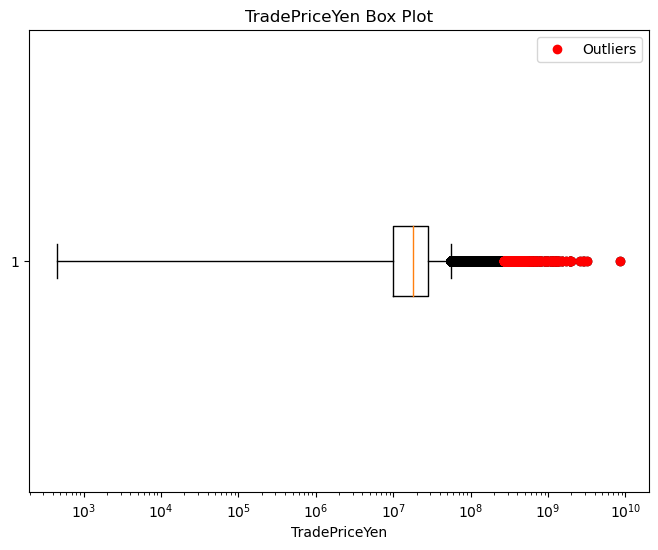

In [15]:
# Calculate the median
median = df['TradePriceYen'].median()

# Quartiles (Q1 and Q3)
q1 = df['TradePriceYen'].quantile(0.25)
q3 = df['TradePriceYen'].quantile(0.995)

# Interquartile range (IQR)
iqr = q3 - q1

# Determining the outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['TradePriceYen'], vert=False)
plt.title('TradePriceYen Box Plot')
plt.xlabel('TradePriceYen')

# Marking the outliers
# Identifying outliers based on TradePriceYen using lower and upper bounds
outliers = df[(df['TradePriceYen'] < lower_bound) | (df['TradePriceYen'] > upper_bound)]['TradePriceYen']
# Plotting outliers on a horizontal line at y=1
plt.plot(outliers, [1] * len(outliers), 'ro', label='Outliers')

plt.legend()
plt.xscale('log')

plt.show()


In [16]:
# Showing only rows where 'TradePriceYen' is less than the 99.5th percentile
df[df['TradePriceYen'] < df['TradePriceYen'].quantile(0.995)]

,No,CityCode,PrefectureName,CityName,DistrictName,NearestStation,TimeToNearestStationOriginal,MinTimeToNearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,AreaIsGreaterFlag,ConstructionYear,PrewarBuildingFlag,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionPeriod,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,3,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,19000000,4LDK,95,0,1997.0,0,RC,NaN,House,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
1,10,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,14000000,4LDK,90,0,1989.0,0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2017,2017,4,Not yet,NaN
2,14,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,25,25.0,25.0,27000000,2LDK,80,0,2002.0,0,RC,House,NaN,Category I Residential Zone,60.0,200.0,2nd quarter 2010,2010,2,Not yet,NaN
3,20,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,NaN,NaN,NaN,30000000,4LDK,120,0,2002.0,0,NaN,House,NaN,Category I Residential Zone,60.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
4,25,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,0,0.0,0.0,19000000,4LDK,95,0,1997.0,0,RC,House,NaN,NaN,NaN,NaN,1st quarter 2011,2011,1,Not yet,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617854,29892,47211,Okinawa Prefecture,Okinawa City,Tobaru,NaN,NaN,NaN,NaN,5800000,3LDK,80,0,1985.0,0,RC,House,NaN,Non-divided City Planning Area,NaN,NaN,2nd quarter 2008,2008,2,Not yet,NaN
617855,29921,47211,Okinawa Prefecture,Okinawa City,Aza Hiyagon,NaN,NaN,NaN,NaN,5000000,3LDK,60,0,1984.0,0,RC,House,NaN,Non-divided City Planning Area,70.0,200.0,3rd quarter 2006,2006,3,Not yet,NaN
617856,29959,47211,Okinawa Prefecture,Okinawa City,Miyazato,NaN,NaN,NaN,NaN,6500000,4LDK,85,0,2001.0,0,RC,House,NaN,Non-divided City Planning Area,70.0,200.0,4th quarter 2008,2008,4,Not yet,Dealings in which auction or arbiter participates
617857,29997,47211,Okinawa Prefecture,Okinawa City,Yamazato,NaN,NaN,NaN,NaN,7000000,3DK,55,0,1991.0,0,RC,House,NaN,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2008,2008,1,Not yet,Dealings in which auction or arbiter participates


In [17]:
df.shape

(617859, 26)

3000 Odd data are outliers and they are not that significant looking at our total number of rows.

Dropping the potential outliers

In [18]:
# Taking quantile as 0.995
quantile_value = df['TradePriceYen'].quantile(0.995)
#Assigning excluding the 3000 rows to df
df = df[df['TradePriceYen'] < quantile_value]
df['TradePriceYen'].describe()

count    6.146940e+05
mean     2.114970e+07
std      1.491496e+07
min      4.500000e+02
25%      1.000000e+07
50%      1.800000e+07
75%      2.800000e+07
max      1.000000e+08
Name: TradePriceYen, dtype: float64

This means that the model has a limitation in TradePriceYen and looks at only prices till 100,000,000.

AreaIsGreaterFlag:	An area of 2000 m^2 or greater, the area data are displayed 2000, and this flag is true.
PrewarBuilding: Buildings built before 1945, the construction year data are displayed as “before the war.” The BuildYear is converted to 1945, and added this flag.

In [19]:
df["AreaIsGreaterFlag"].value_counts()

AreaIsGreaterFlag
0    614692
1         2
Name: count, dtype: int64

There are just two data points.

In [20]:
df["PrewarBuildingFlag"].value_counts()

PrewarBuildingFlag
0    614144
1       550
Name: count, dtype: int64

There are 533 units. But I am not considering the building before 1945.


Hence dropping these rows where the flag is 1 and dropping the columns.

In [21]:
# Dropping rows based on condition where they are 1
df = df[(df["AreaIsGreaterFlag"] == False) & (df["PrewarBuildingFlag"] == False)]
# Dropping columns
df = df.drop(columns=["AreaIsGreaterFlag", "PrewarBuildingFlag"])

In [22]:
df.shape

(614142, 24)

Japan's main level of administaration is prefectures. The administrative structure can differ from one place to another in Japan, and not all cities have associated district names and vice versa. The specific naming conventions and divisions are determined by local government authorities and can vary based on historical, geographical, and administrative factors.

In [23]:
# List of columns related to the area
Area_cols = ['DistrictName', 'CityCode', 'CityName', 'PrefectureName']
# Iterate through each area related column
for column in Area_cols:
    # Displaying the the column name
    print(column)
    # Printing the number of unique values in the column
    print(df[column].nunique())

DistrictName
12022
CityCode
618
CityName
617
PrefectureName
47


Hence just using prefectures is less ambiguous and for now not looking into more granularity. For now just dropping DistrictNames,CityCode and CityName columns.

In [24]:
#Dropping area related columns
df.drop(columns=['DistrictName','CityCode','CityName'], inplace=True)
df.isna().sum()

No                                      0
PrefectureName                          0
NearestStation                       2577
TimeToNearestStationOriginal        22857
MinTimeToNearestStation             22857
MaxTimeToNearestStation             23663
TradePriceYen                           0
FloorPlan                           20513
SurveyedAreaM2                          0
ConstructionYear                    17461
BuildingStructure                   12561
CurrentUsage                        39569
FutureUsePurpose                   359161
CityPlanningCategory                18132
MaxBuildingCoverageRatioPercent     21954
MaxFloorAreaRatioPercent            21954
TransactionPeriod                       0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                    54098
Notes                              596103
dtype: int64

Also dropping the the column `No`

In [25]:
df.drop(columns=['No'], inplace=True)

# Dealing with Duplicates

In [26]:
df.duplicated().sum()

7369

The dupication might be because in Apartment or Condo buildings there might be simillar condos going at the same price with the same attributes. So for further analysis dropping these as it will just be redundant information.

In [27]:
# Drop duplicate columns
df = df.drop_duplicates()

In [28]:
df.shape

(606773, 20)

In [29]:
df.isna().sum()

PrefectureName                          0
NearestStation                       2557
TimeToNearestStationOriginal        22305
MinTimeToNearestStation             22305
MaxTimeToNearestStation             23107
TradePriceYen                           0
FloorPlan                           20335
SurveyedAreaM2                          0
ConstructionYear                    17377
BuildingStructure                   12475
CurrentUsage                        39460
FutureUsePurpose                   353443
CityPlanningCategory                17939
MaxBuildingCoverageRatioPercent     21728
MaxFloorAreaRatioPercent            21728
TransactionPeriod                       0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                    53178
Notes                              588847
dtype: int64

So I just require a single time value called Time to nearest station instead of Max and min values for time to nearest station for analysis. I will just take the max time to reach the nearest station as a standard value. and fill the empty `MaxTimeToNearestStation` with the `MinTimeToNearestStation` because in the original data it just has a single time andd has no min-max times.


In [30]:
# Fill missing values in 'MaxTimeToNearestStation' with corresponding values from 'MinTimeToNearestStation'
df['MaxTimeToNearestStation'].fillna(df['MinTimeToNearestStation'], inplace=True)
# Droping unnecessary columns 'TimeToNearestStationOriginal' and 'MinTimeToNearestStation'
df.drop(columns=["TimeToNearestStationOriginal", "MinTimeToNearestStation"], inplace=True)
# Displaying the count of missing values
missing_values_count = df.isna().sum()
print(missing_values_count)

PrefectureName                          0
NearestStation                       2557
MaxTimeToNearestStation             22305
TradePriceYen                           0
FloorPlan                           20335
SurveyedAreaM2                          0
ConstructionYear                    17377
BuildingStructure                   12475
CurrentUsage                        39460
FutureUsePurpose                   353443
CityPlanningCategory                17939
MaxBuildingCoverageRatioPercent     21728
MaxFloorAreaRatioPercent            21728
TransactionPeriod                       0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                    53178
Notes                              588847
dtype: int64


Drop `TransactionPeriod` because it is redundant in `TransactionYearQuarter` and `TransactionYear`

In [31]:
#Dropping column `TransactionPeriod`
df.drop(columns=['TransactionPeriod'], inplace=True)

In [32]:
df.head()

,PrefectureName,NearestStation,MaxTimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,ConstructionYear,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionYear,TransactionYearQuarter,RenovationStatus,Notes
0,Hokkaido,Maruyamakoen,20.0,19000000,4LDK,95,1997.0,RC,NaN,House,Neighborhood Commercial Zone,80.0,200.0,2018,4,Not yet,NaN
1,Hokkaido,Maruyamakoen,23.0,14000000,4LDK,90,1989.0,RC,House,House,Category I Exclusively Low-story Residential Zone,40.0,80.0,2017,4,Not yet,NaN
2,Hokkaido,Maruyamakoen,25.0,27000000,2LDK,80,2002.0,RC,House,NaN,Category I Residential Zone,60.0,200.0,2010,2,Not yet,NaN
3,Hokkaido,Maruyamakoen,NaN,30000000,4LDK,120,2002.0,NaN,House,NaN,Category I Residential Zone,60.0,200.0,2006,3,Not yet,NaN
4,Hokkaido,Maruyamakoen,0.0,19000000,4LDK,95,1997.0,RC,House,NaN,NaN,NaN,NaN,2011,1,Not yet,NaN


In [33]:
df['Notes'].value_counts()

Notes
Dealings in which auction or arbiter participates                                                           16881
Dealings between related objects                                                                              843
Dealings including special circumstances                                                                       85
Dealings of real estate that includes wound etc.                                                               64
Dealings of real estate to which mortgage etc. are set                                                         46
Dealings in which auction or arbiter participates,Dealings of real estate that includes wound etc.              2
Dealings of real estate to which mortgage etc. are set,Dealings in which auction or arbiter participates        2
Dealings between related objects,Dealings in which auction or arbiter participates                              2
Dealings between related objects,Dealings of real estate that includes wound etc. 

Here 97% rows for Notes(About dealings) are empty so dropping the column.

In [34]:
# Dropping the column notes
df.drop(columns=['Notes'], inplace=True)

# Dealing with nulls

Let us look at Rennovation status firstly.

In [35]:
# Rows where 'RenovationStatus' is null
renovation_null_rows = df[df['RenovationStatus'].isna()]
# value counts of 'CurrentUsage' for the filtered rows
current_usage_counts = renovation_null_rows['CurrentUsage'].value_counts()
#Value counts of CurrentUsage for RenovationStatus is null
print(current_usage_counts)

CurrentUsage
House                46410
Shop                   365
Office                 333
Other                  129
Parking Lot             36
Warehouse               10
Office, Shop             9
House, Shop              6
House, Office            2
House, Other             2
Warehouse, Shop          1
Parking Lot, Shop        1
Factory                  1
Name: count, dtype: int64


The above EDA was to check if there was a relation between Renovation Status and current usage. It was to check if there was a certain category of building that had Renovation status as null. But doesn't seem to have a pattern. It can be checked with other columns as well. As of now no relation was found.

In [36]:
df['RenovationStatus'].value_counts()

RenovationStatus
Not yet    398751
Done       154844
Name: count, dtype: int64

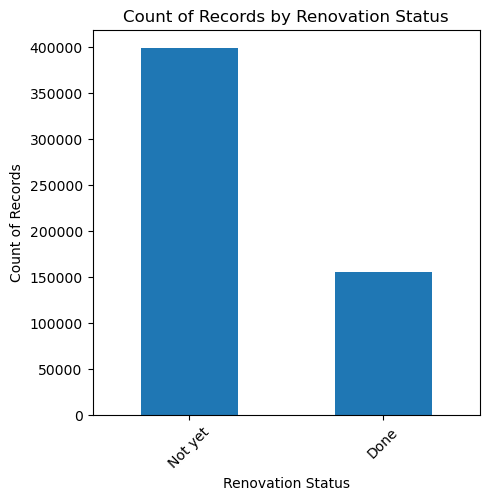

In [37]:
# Counting the number of records for each unique 'RenovationStatus' value
renovation_counts = df['RenovationStatus'].value_counts()
#Bar plot
plt.figure(figsize=(5, 5))
renovation_counts.plot(kind='bar')
plt.title('Count of Records by Renovation Status')
plt.xlabel('Renovation Status')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.show()

Let us look if there was a year range where `RenovationStatus` was Not yet or Done so that we can impute  the values.

In [38]:
# Filter rows where 'RenovationStatus' is 'Not yet' or 'Done'
renov_df = df[df['RenovationStatus'].isin(['Not yet', 'Done'])]
# Grouping the filtered data by 'RenovationStatus' and calculate the range of 'ConstructionYear'
range_of_construction_years = renov_df.groupby('RenovationStatus')['ConstructionYear'].agg(['min', 'max'])
print(range_of_construction_years)

                     min     max
RenovationStatus                
Done              1946.0  2019.0
Not yet           1946.0  2019.0


No such year range. Let us then impute according to the ratio of the value counts.

In [39]:
# Total number of null values to impute
total_null_values = df['RenovationStatus'].isnull().sum()
# The desired ratio from my value_counts
desired_ratio = 398751/154844
# The number of imputed values for "Not yet" and "Done" based on the ratio
num_not_yet = round(total_null_values / (desired_ratio + 1))
num_done = total_null_values - num_not_yet
# Creating a list of imputed values where the count is based on the calculated numbers for "Not yet" and "Done".
imputed_values = ['Not yet'] * num_not_yet + ['Done'] * num_done
# Shuffling the list to assign values randomly
random.shuffle(imputed_values)
# Replacing the null values with the imputed values
df.loc[df['RenovationStatus'].isnull(), 'RenovationStatus'] = imputed_values

In [40]:
df.isna().sum()

PrefectureName                          0
NearestStation                       2557
MaxTimeToNearestStation             22305
TradePriceYen                           0
FloorPlan                           20335
SurveyedAreaM2                          0
ConstructionYear                    17377
BuildingStructure                   12475
CurrentUsage                        39460
FutureUsePurpose                   353443
CityPlanningCategory                17939
MaxBuildingCoverageRatioPercent     21728
MaxFloorAreaRatioPercent            21728
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
dtype: int64

To impute the values in `MaxTimeToNearestStation` first group by the `NearestStation` and find the corresponding mean time for those stations and then impute that mean to matching `MaxTimeToNearestStation`.

In [41]:
# Group by 'NearestStation' and calculate the mean of 'MaxTimeToNearestStation'
mean_max_time_by_station = df.groupby('NearestStation')['MaxTimeToNearestStation'].mean()
print(mean_max_time_by_station)

NearestStation
Abekawa                    20.571429
Abeno                       3.958621
Abeyamakoen                 9.339623
Abiko                       9.239394
Abikocho                    5.518519
                             ...    
Zeze                       10.605714
Zoshigaya (Tokyo Metro)     4.441065
Zoshiki                     8.593148
Zuiko 4-chome               7.137931
Zushi                      55.525469
Name: MaxTimeToNearestStation, Length: 3778, dtype: float64


In [42]:
# Filling missing values in 'MaxTimeToNearestStation' based on the mean values
df['MaxTimeToNearestStation'].fillna(df['NearestStation'].map(mean_max_time_by_station), inplace=True)
df.isna().sum()

PrefectureName                          0
NearestStation                       2557
MaxTimeToNearestStation              2585
TradePriceYen                           0
FloorPlan                           20335
SurveyedAreaM2                          0
ConstructionYear                    17377
BuildingStructure                   12475
CurrentUsage                        39460
FutureUsePurpose                   353443
CityPlanningCategory                17939
MaxBuildingCoverageRatioPercent     21728
MaxFloorAreaRatioPercent            21728
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
dtype: int64

Now we cannot impute values in `NearestStation` randomly and hence cannot impute `MaxTimeToNearestStation`. Dropping the rest of the null values in `MaxTimeToNearestStation`.

In [43]:
#Dropping the null rows in `MaxTimeToNearestStation`
df.dropna(subset = ["MaxTimeToNearestStation"], inplace=True)

These are the grouping of each Station and their times. Fillng missing values in 'MaxTimeToNearestStation' based on the mean values from this mapping.

In [44]:
#Renaming MaxTimeToNearestStation to TimeToNearestStation
df.rename(columns={'MaxTimeToNearestStation': 'TimeToNearestStation'}, inplace=True)

In [45]:
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                           19981
SurveyedAreaM2                          0
ConstructionYear                    16707
BuildingStructure                   12300
CurrentUsage                        39397
FutureUsePurpose                   351146
CityPlanningCategory                16327
MaxBuildingCoverageRatioPercent     20074
MaxFloorAreaRatioPercent            20074
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
dtype: int64

Identify the unique categories of `FloorPlan` that are most common for different ranges or bins of `SurveyedAreaM2`.
For each unique `FloorPlan` category, calculate the most frequent 'SurveyedAreaM2' range or bin.
Fill missing values in `FloorPlan` based on the most common 'FloorPlan' category for the corresponding `SurveyedAreaM2` range.

In [46]:
# Bin edges for 'SurveyedAreaM2'
bin_edges = [0, 250, 500, 1000, 1250, 1500,1750,2000] 

# New column 'SurveyedAreaM2_Bin' to represent bins
df['SurveyedAreaM2_Bin'] = pd.cut(df['SurveyedAreaM2'], bin_edges)
#print(df['SurveyedAreaM2_Bin'])

def get_mode_or_default(group, default_value):
    try:
        #Filtering out 'Unknown' values within the group
        valid_values = group[group != 'Unknown']
        # Mode for the remaining valid values
        mode_value = valid_values.mode().iloc[0]
        #Returning the calculated mode
        return mode_value
    except IndexError:
        #If there is no mode (e.g., all values are 'Unknown'), return the default value
        return default_value

# Most frequent 'FloorPlan' category for each 'SurveyedAreaM2' bin
# The function takes each group 'x' and calculates the most frequent 'FloorPlan' category for that group using the get_mode_or_default function. 
most_frequent_floorplan=df.groupby('SurveyedAreaM2_Bin')['FloorPlan'].apply(lambda x: get_mode_or_default(x, default_value='Unknown'))
print(most_frequent_floorplan)

# Filling missing values in 'FloorPlan' based on the most frequent category for each 'SurveyedAreaM2' bin
df['FloorPlan'] = df['FloorPlan'].fillna(df['SurveyedAreaM2_Bin'].map(most_frequent_floorplan))

SurveyedAreaM2_Bin
(0, 250]              3LDK
(250, 500]      Open Floor
(500, 1000]     Open Floor
(1000, 1250]       Unknown
(1250, 1500]    Open Floor
(1500, 1750]       Unknown
(1750, 2000]       Unknown
Name: FloorPlan, dtype: object


In [47]:
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                    16707
BuildingStructure                   12300
CurrentUsage                        39397
FutureUsePurpose                   351146
CityPlanningCategory                16327
MaxBuildingCoverageRatioPercent     20074
MaxFloorAreaRatioPercent            20074
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

Here I am finding the median of `MaxBuildingCoverageRatioPercent`and `MaxFloorAreaRatioPercent` for each `Floor plan` and `SurroundingAreaM2`group.Taking median because it is less sensitive to outliers compared to the mean provides a more robust measure of central tendency.

Then filling the missing value in `MaxBuildingCoverageRatioPercent`and `MaxFloorAreaRatioPercent` with the median looking at the `Floor plan` and `SurroundingAreaM2`group. Now certain combinations can have nulls. Like in this:

4LDK              (0, 250]              60.0

                  (250, 500]            60.0
                  
                  (500, 1000]           70.0
                  
                  (1000, 1250]           NaN (null combination)
                  
                  (1250, 1500]           NaN (null combination)
                  
                  (1500, 1750]           NaN (null combination)
                  
                  (1750, 2000]           NaN (null combination)
                  
                  
It will remain null for such cases.In such cases I will drop the rows because then that is an outlier. 
                  
                  

In [48]:
# Bin edges for 'SurveyedAreaM2'
bin_edges = [0, 250, 500, 1000, 1250, 1500, 1750, 2000]

# New column 'SurveyedAreaM2_Bin' to represent bins
df['SurveyedAreaM2_Bin'] = pd.cut(df['SurveyedAreaM2'], bins=bin_edges)

# Grouping the data by 'FloorPlan' and 'SurveyedAreaM2_Bin'
grouped_data = df.groupby(['FloorPlan', 'SurveyedAreaM2_Bin'])

# Calculating the median 'MaxBuildingCoverageRatioPercent' and 'MaxFloorAreaRatioPercent' for each group
median_max_building_coverage = grouped_data['MaxBuildingCoverageRatioPercent'].median()
median_max_floor_area = grouped_data['MaxFloorAreaRatioPercent'].median()
#print(median_max_building_coverage)
#print(median_max_floor_area)

# Filling null values in 'MaxBuildingCoverageRatioPercent' and 'MaxFloorAreaRatioPercent' based on the group medians
df['MaxBuildingCoverageRatioPercent'].fillna(df.set_index(['FloorPlan', 'SurveyedAreaM2_Bin'])['MaxBuildingCoverageRatioPercent'].fillna(median_max_building_coverage).reset_index()['MaxBuildingCoverageRatioPercent'], inplace=True)
df['MaxFloorAreaRatioPercent'].fillna(df.set_index(['FloorPlan', 'SurveyedAreaM2_Bin'])['MaxFloorAreaRatioPercent'].fillna(median_max_floor_area).reset_index()['MaxFloorAreaRatioPercent'], inplace=True)
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                    16707
BuildingStructure                   12300
CurrentUsage                        39397
FutureUsePurpose                   351146
CityPlanningCategory                16327
MaxBuildingCoverageRatioPercent      1708
MaxFloorAreaRatioPercent             1708
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

In [49]:
df.dropna(subset = ["MaxBuildingCoverageRatioPercent","MaxFloorAreaRatioPercent"], inplace=True)
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                    16309
BuildingStructure                   12026
CurrentUsage                        39192
FutureUsePurpose                   350280
CityPlanningCategory                14796
MaxBuildingCoverageRatioPercent         0
MaxFloorAreaRatioPercent                0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

Checking if I can fill the `ConstructionYear` with `BuildingStructure`.(Using Chi squared as it is categorical columns)

In [50]:
# from scipy.stats import f_oneway

# # Perform one-way ANOVA
# groups = [df[df['BuildingStructure'] == group]['ConstructionYear'] for group in df['BuildingStructure'].unique()]
# f_statistic, p_value = f_oneway(*groups)

# print("F-statistic:", f_statistic)
# print("p-value:", p_value)

# # Interpret the results based on the p-value
# if p_value < 0.05:
#     print("Reject the null hypothesis: There are significant differences between groups.")
# else:
#     print("Fail to reject the null hypothesis: There are no significant differences between groups.")


In [51]:
contingency_table = pd.crosstab(df['ConstructionYear'], df['BuildingStructure'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("{:.17f}".format(p))

0.00000000000000000


In [52]:
contingency_table

BuildingStructure,B,LS,RC,"RC, B","RC, S","RC, W",S,SRC,"SRC, RC","SRC, RC, S","SRC, S",W
ConstructionYear,,,,,,,,,,,,
1946.0,0,0,15,0,0,0,0,1,0,0,0,0
1947.0,0,0,20,0,0,0,0,0,0,0,0,0
1948.0,0,0,5,0,0,0,0,0,0,0,0,0
1949.0,0,0,7,0,0,0,0,0,0,0,0,0
1950.0,0,0,8,0,0,0,0,0,0,0,0,0
1951.0,0,0,1,0,0,0,0,2,0,0,0,0
1952.0,0,0,5,0,0,0,0,1,0,0,0,0
1953.0,0,0,3,0,0,0,0,6,0,0,0,0
1954.0,0,0,5,0,0,0,0,1,0,0,0,0


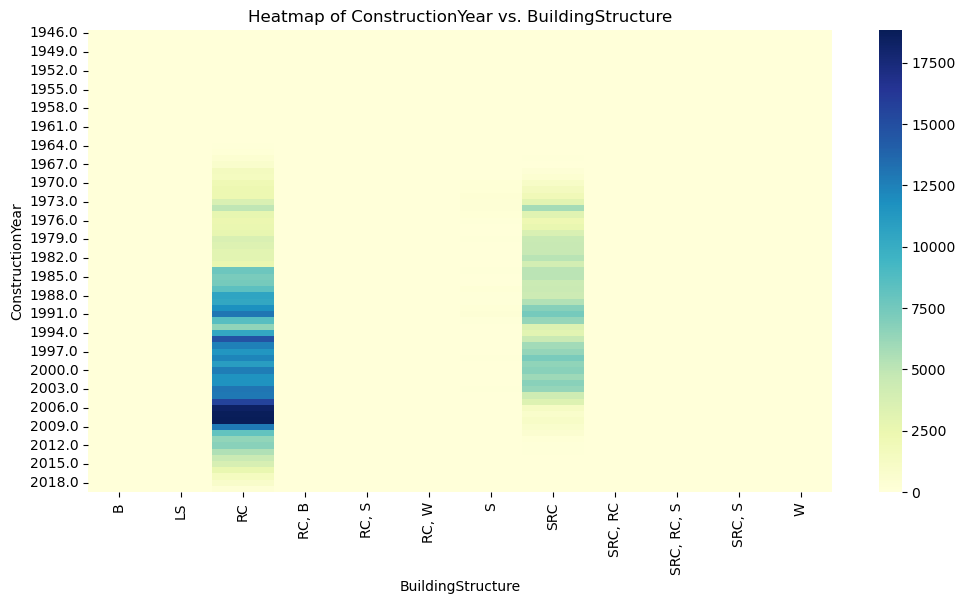

In [53]:
#Plotting the heatmap of the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap of ConstructionYear vs. BuildingStructure')
plt.show()

In [54]:
df["BuildingStructure"].value_counts()

BuildingStructure
RC            406762
SRC           178553
S               4006
SRC, RC          618
RC, S            256
SRC, S           137
W                 79
B                 21
LS                18
SRC, RC, S         2
RC, B              1
RC, W              1
Name: count, dtype: int64

In [55]:
# Grouping the data by 'ConstructionYear' and getting the unique 'BuildingStructure' values
construction_year_building_structure = df.groupby('ConstructionYear')['BuildingStructure'].unique()
# Calculating the most popular 'BuildingStructure' for each year
most_popular_structure = df.groupby('ConstructionYear')['BuildingStructure'].agg(lambda x: x.value_counts().idxmax())
result = pd.DataFrame({'ConstructionYear': most_popular_structure.index, 'MostPopularBuildingStructure': most_popular_structure.values})
print(result)

    ConstructionYear MostPopularBuildingStructure
0             1946.0                           RC
1             1947.0                           RC
2             1948.0                           RC
3             1949.0                           RC
4             1950.0                           RC
5             1951.0                          SRC
6             1952.0                           RC
7             1953.0                          SRC
8             1954.0                           RC
9             1955.0                           RC
10            1956.0                           RC
11            1957.0                           RC
12            1958.0                          SRC
13            1959.0                          SRC
14            1960.0                          SRC
15            1961.0                           RC
16            1962.0                           RC
17            1963.0                           RC
18            1964.0                           RC


With the `BuildingStructure` given I cannot fill the `ConstructionYear` as it can be any one of these years but I may do **vice versa**.

Filling `BuildingStructure` with `ConstructionYear`

In [56]:
# replacing missing 'BuildingStructure' values with the mode for their corresponding 'ConstructionYear'
df['BuildingStructure'] = df['BuildingStructure'].fillna(df['ConstructionYear'].map(most_popular_structure))
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                    16309
BuildingStructure                    2275
CurrentUsage                        39192
FutureUsePurpose                   350280
CityPlanningCategory                14796
MaxBuildingCoverageRatioPercent         0
MaxFloorAreaRatioPercent                0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

Construction year cannot be imputed so dropping all th missing values in that

In [57]:
# Dropping null rows in `ConstructionYear`
df.dropna(subset=['ConstructionYear'], inplace=True)
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                        0
BuildingStructure                       0
CurrentUsage                        36669
FutureUsePurpose                   342697
CityPlanningCategory                12089
MaxBuildingCoverageRatioPercent         0
MaxFloorAreaRatioPercent                0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

Now let us deal with FutureUsePurpose and CurrentUsage

Checking the relation of FloorPlan and Current usage.

In [58]:
# Contingency table
contingency_table = pd.crosstab(df['CurrentUsage'].fillna('Missing'), df['FloorPlan'])
# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 331917.0425800548, p-value: 0.0


A chi-squared test with a chi-squared statistic of 331917.0425800548 and a p-value of 0.0 is indicating an  strong association between the two categorical variables being tested. The p-value of 0.0 means that the observed relationship is highly significant and unlikely to have occurred by chance.

In [59]:
# Dictionary to store the mode of 'CurrentUsage' for each 'FloorPlan' code
floorplan_mode_dict = df.groupby('FloorPlan')['CurrentUsage'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
# Missing 'CurrentUsage' values
missing_current_usage = df['CurrentUsage'].isnull()
# Filling the missing values in 'CurrentUsage' based on the 'FloorPlan' mode
df.loc[missing_current_usage, 'CurrentUsage'] = df.loc[missing_current_usage, 'FloorPlan'].map(floorplan_mode_dict)
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                        0
BuildingStructure                       0
CurrentUsage                            0
FutureUsePurpose                   342697
CityPlanningCategory                12089
MaxBuildingCoverageRatioPercent         0
MaxFloorAreaRatioPercent                0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

`FutureUsePurpose` has 58% missing data.  So let us run few statistical tests to take the decision to drop them or not.

In [60]:
# Selecting rows where 'FutureUsePurpose' is not null
notna_rows = df[df['FutureUsePurpose'].notna()]
# Extracting specific columns ('FutureUsePurpose' and 'TradePriceYen') from the selected rows
selected_columns = notna_rows[['FutureUsePurpose', 'TradePriceYen']]
# Displaying the resulting DataFrame showing 'FutureUsePurpose' and 'TradePriceYen' columns
selected_columns

,FutureUsePurpose,TradePriceYen
0,House,19000000
1,House,14000000
6,House,11000000
9,Office,13000000
12,House,40000000
...,...,...
616841,House,15000000
616853,House,21000000
616862,House,18000000
616863,House,19000000


In [61]:
subset_df = df[df['FutureUsePurpose'].notna()][['FutureUsePurpose', 'TradePriceYen']]
# Grouping the data by 'FutureUsePurpose' and get the corresponding 'TradePriceYen' values
groups = {}
for future_use, group_data in subset_df.groupby('FutureUsePurpose'):
    groups[future_use] = group_data['TradePriceYen']
#ANOVA
f_statistic, p_value = f_oneway(*groups.values())
print("F-statistic:", f_statistic)
print("p-value:", p_value)
# Checking results
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between groups.")


F-statistic: 562.1476624428938
p-value: 0.0
Reject the null hypothesis: There are significant differences between groups.


It assesses whether the categories have different average trade prices (mean values) and, if the p-value is significant, indicates that at least one category is different from the others in terms of the "TradePriceYen" variable.

In [62]:
# Checking the normality for each group using the Shapiro-Wilk test
for group, data in groups.items():
    _, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk p-value for group '{group}': {p_value}")
# Checking homoscedasticity using Levene's test
_, p_value = stats.levene(*groups.values())
print("Levene's Test p-value:", p_value)

Shapiro-Wilk p-value for group 'House': 0.0
Shapiro-Wilk p-value for group 'Office': 0.0
Shapiro-Wilk p-value for group 'Other': 0.0
Shapiro-Wilk p-value for group 'Shop': 2.5505394471458157e-31
Levene's Test p-value: 7.727742319401544e-100


C:\Users\Thekku\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical tests show that the data does not meet the assumptions of normality and homoscedasticity, which are required for traditional parametric tests like the ANOVA. Given these violations, it is more appropriate to use non-parametric tests, such as the Kruskal-Wallis test, to compare the groups. The Kruskal-Wallis test is robust to these assumptions and is suitable for your data when normality and equal variance assumptions are not met.

In [63]:
# Kruskal-Wallis test
_, p_value = kruskal(*groups.values())
print("Kruskal-Wallis Test p-value:", p_value)
# If the Kruskal-Wallis test is significant (p-value < 0.05), perform Dunn test
if p_value < 0.05:
    dunn_results = sp.posthoc_dunn(subset_df, val_col='TradePriceYen', group_col='FutureUsePurpose', p_adjust='bonferroni')
    print("Dunn Test Results:")
    print(dunn_results)
else:
    print("Kruskal-Wallis test is not significant. No post-hoc tests performed.")

Kruskal-Wallis Test p-value: 0.0
Dunn Test Results:
                House         Office     Other          Shop
House    1.000000e+00  8.691254e-122  0.000000  1.681190e-20
Office  8.691254e-122   1.000000e+00  0.000382  1.820986e-03
Other    0.000000e+00   3.815683e-04  1.000000  6.639046e-01
Shop     1.681190e-20   1.820986e-03  0.663905  1.000000e+00


The Kruskal-Wallis test has produced a highly significant p-value (p-value: 0.0), indicating that there are significant differences among the groups. This result aligns with the findings from the Dunn test, which is a post-hoc test used for pairwise comparisons between the groups.

Note:There is not significant difference between other and shops.

Let us not drop them and impute missing values

In [64]:
df.columns

Index(['PrefectureName', 'NearestStation', 'TimeToNearestStation',
       'TradePriceYen', 'FloorPlan', 'SurveyedAreaM2', 'ConstructionYear',
       'BuildingStructure', 'CurrentUsage', 'FutureUsePurpose',
       'CityPlanningCategory', 'MaxBuildingCoverageRatioPercent',
       'MaxFloorAreaRatioPercent', 'TransactionYear', 'TransactionYearQuarter',
       'RenovationStatus', 'SurveyedAreaM2_Bin'],
      dtype='object')

In [65]:
df['FutureUsePurpose'].value_counts(dropna=False)

FutureUsePurpose
NaN       342697
House     226209
Other      13675
Office      2694
Shop         896
Name: count, dtype: int64

In [66]:
df.isna().sum()

PrefectureName                          0
NearestStation                          0
TimeToNearestStation                    0
TradePriceYen                           0
FloorPlan                               0
SurveyedAreaM2                          0
ConstructionYear                        0
BuildingStructure                       0
CurrentUsage                            0
FutureUsePurpose                   342697
CityPlanningCategory                12089
MaxBuildingCoverageRatioPercent         0
MaxFloorAreaRatioPercent                0
TransactionYear                         0
TransactionYearQuarter                  0
RenovationStatus                        0
SurveyedAreaM2_Bin                      0
dtype: int64

Checking if there is relation with FloorPlan and FutureUsagePurpose.

In [67]:
# Contingency table
contingency_table = pd.crosstab(df['FutureUsePurpose'].fillna('Missing'), df['FloorPlan'])
# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 99910.70499384074, p-value: 0.0


Checking if there is relation with CurrentUsage and FutureUsePurpose.

In [68]:
# Contingency table
contingency_table = pd.crosstab(df['FutureUsePurpose'].fillna('Missing'), df['CurrentUsage'])
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 147731.06830096728, p-value: 0.0


A chi-squared test with a chi-squared statistic of 173122.77576948635 and a p-value of 0.0 is indicating an strong association between the two categorical variables being tested. The p-value of 0.0 means that the observed relationship is highly significant and unlikely to have occurred by chance.

In [69]:
# Dictionary to store the mode of 'FutureUsePurpose' for each 'CurrentUsage' code
currentusage_mode_dict = df.groupby('CurrentUsage')['FutureUsePurpose'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
# Missing 'FutureUsePurpose' values
missing_future_use = df['FutureUsePurpose'].isnull()
# Filling missing values in 'FutureUsePurpose' based on the 'CurrentUsage' mode
df.loc[missing_future_use, 'FutureUsePurpose'] = df.loc[missing_future_use, 'CurrentUsage'].map(currentusage_mode_dict)
df.isnull().sum()

PrefectureName                         0
NearestStation                         0
TimeToNearestStation                   0
TradePriceYen                          0
FloorPlan                              0
SurveyedAreaM2                         0
ConstructionYear                       0
BuildingStructure                      0
CurrentUsage                           0
FutureUsePurpose                       3
CityPlanningCategory               12089
MaxBuildingCoverageRatioPercent        0
MaxFloorAreaRatioPercent               0
TransactionYear                        0
TransactionYearQuarter                 0
RenovationStatus                       0
SurveyedAreaM2_Bin                     0
dtype: int64

In [70]:
currentusage_mode_dict

{'Factory': 'Office',
 'House': 'House',
 'House, Office': 'Office',
 'House, Office, Parking Lot, Shop': None,
 'House, Other': 'House',
 'House, Parking Lot': 'House',
 'House, Shop': 'Shop',
 'House, Shop, Other': None,
 'House, Warehouse': 'House',
 'Office': 'Office',
 'Office, Parking Lot': 'Other',
 'Office, Shop': 'Shop',
 'Office, Warehouse': 'Office',
 'Other': 'Other',
 'Parking Lot': 'Other',
 'Parking Lot, Shop': 'Other',
 'Shop': 'Shop',
 'Shop, Other': None,
 'Warehouse': 'Other',
 'Warehouse, Parking Lot': 'Other',
 'Warehouse, Shop': 'Shop',
 'Workshop': 'Office'}

In [71]:
df[df['FutureUsePurpose'].isna()]

,PrefectureName,NearestStation,TimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,ConstructionYear,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionYear,TransactionYearQuarter,RenovationStatus,SurveyedAreaM2_Bin
188627,Tokyo,Meguro,1.0,24000000,Open Floor,35,1987.0,SRC,"Shop, Other",None,Commercial Zone,80.0,700.0,2009,2,Not yet,"(0, 250]"
570544,Hiroshima Prefecture,Midorii,1.0,32000000,3LDK,80,2003.0,SRC,"House, Office, Parking Lot, Shop",None,Commercial Zone,80.0,400.0,2007,1,Not yet,"(0, 250]"
577075,Kochi Prefecture,Asakura (JR),25.0,8000000,4LDK,70,1991.0,RC,"House, Shop, Other",None,Category I Residential Zone,60.0,200.0,2009,3,Not yet,"(0, 250]"


There are few few datapoints in CurrentUsage where there are no FutureUsePurpose drooping those 3 rows. And look like there is just one datapoint too.

In [72]:
df.dropna(subset=["FutureUsePurpose"], inplace=True)

Let check for CityPlanningCategory

In [73]:
# Contingency table
contingency_table = pd.crosstab(df['CityPlanningCategory'].fillna('Missing'), df['FloorPlan'])
# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 83336.22522348045, p-value: 0.0


In [74]:
# Ccontingency table
contingency_table = pd.crosstab(df['CityPlanningCategory'].fillna('Missing'), df['CurrentUsage'])
# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 7301.562045640132, p-value: 0.0


In [75]:
# Contingency table
contingency_table = pd.crosstab(df['CityPlanningCategory'].fillna('Missing'), df['FutureUsePurpose'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 8944.78056237029, p-value: 0.0


In [76]:
# Contingency table
contingency_table = pd.crosstab(df['CityPlanningCategory'].fillna('Missing'), df['PrefectureName'])

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 161427.22318028024, p-value: 0.0


Look like there is good relation here so imputing with the mode of CityPlanningCategory for each PrefectureName.

In [77]:
# Dictionary to store the mode of 'CityPlanningCategory' for each 'PrefectureName' code
prefecture_mode_dict = df.groupby('PrefectureName')['CityPlanningCategory'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
# Missing 'CityPlanningCategory' values
missing_city_planning = df['CityPlanningCategory'].isnull()
# Filling missing values in 'CityPlanningCategory' based on the 'PrefectureName' mode
df.loc[missing_city_planning, 'CityPlanningCategory'] = df.loc[missing_city_planning, 'PrefectureName'].map(prefecture_mode_dict)
df.isnull().sum()

PrefectureName                     0
NearestStation                     0
TimeToNearestStation               0
TradePriceYen                      0
FloorPlan                          0
SurveyedAreaM2                     0
ConstructionYear                   0
BuildingStructure                  0
CurrentUsage                       0
FutureUsePurpose                   0
CityPlanningCategory               0
MaxBuildingCoverageRatioPercent    0
MaxFloorAreaRatioPercent           0
TransactionYear                    0
TransactionYearQuarter             0
RenovationStatus                   0
SurveyedAreaM2_Bin                 0
dtype: int64

# Further Data Cleaning

In [78]:
df['CurrentUsage'].value_counts(dropna=False)

CurrentUsage
House                     579198
Office                      3224
Shop                        2801
Other                        640
Parking Lot                   88
House, Shop                   51
Office, Shop                  50
Warehouse                     48
House, Office                 30
House, Other                  15
Factory                        6
Warehouse, Parking Lot         3
Warehouse, Shop                3
House, Parking Lot             3
Office, Warehouse              2
Workshop                       2
Parking Lot, Shop              2
House, Warehouse               1
Office, Parking Lot            1
Name: count, dtype: int64

Now it will be too confusing to all such categories with very less data points for each category. So just keeping "House", "Office", "Shop", "Other"

In [79]:
# List of categories to keep
valid_categories = ["House", "Office", "Shop", "Other"]
# Replacing categories that are not in the list with "Other"
df['CurrentUsage'] = df['CurrentUsage'].apply(lambda x: x if pd.isna(x) or x in valid_categories else "Other")
df['CurrentUsage'].value_counts(dropna=False)

CurrentUsage
House     579198
Office      3224
Shop        2801
Other        945
Name: count, dtype: int64

Now let us drop few columns not may not be required for analysis.

In [80]:
df = df.drop(columns=['SurveyedAreaM2_Bin'])

In [81]:
df["CityPlanningCategory"].value_counts()

CityPlanningCategory
Commercial Zone                                         168113
Category I Exclusively Medium-high Residential Zone      94135
Category I Residential Zone                              91740
Quasi-industrial Zone                                    67598
Neighborhood Commercial Zone                             60040
Category II Exclusively Medium-high Residential Zone     27572
Category II Residential Zone                             27032
Category I Exclusively Low-story Residential Zone        17946
Industrial Zone                                          14984
Quasi-residential Zone                                   11868
Urbanization Control Area                                 3746
Category II Exclusively Low-story Residential Zone         782
Non-divided City Planning Area                             218
Exclusively Industrial Zone                                211
Outside City Planning Area                                 180
Quasi-city Planning Area          

Removing Outside City Planning Area  as there is just 3 data points.

In [82]:
df = df[df['CityPlanningCategory'] != 'Outside City Planning Area']

In [83]:
df.shape

(585988, 16)

In [84]:
df.columns

Index(['PrefectureName', 'NearestStation', 'TimeToNearestStation',
       'TradePriceYen', 'FloorPlan', 'SurveyedAreaM2', 'ConstructionYear',
       'BuildingStructure', 'CurrentUsage', 'FutureUsePurpose',
       'CityPlanningCategory', 'MaxBuildingCoverageRatioPercent',
       'MaxFloorAreaRatioPercent', 'TransactionYear', 'TransactionYearQuarter',
       'RenovationStatus'],
      dtype='object')

Checking the datatypes again

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585988 entries, 0 to 617809
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   PrefectureName                   585988 non-null  object 
 1   NearestStation                   585988 non-null  object 
 2   TimeToNearestStation             585988 non-null  float64
 3   TradePriceYen                    585988 non-null  int64  
 4   FloorPlan                        585988 non-null  object 
 5   SurveyedAreaM2                   585988 non-null  int64  
 6   ConstructionYear                 585988 non-null  float64
 7   BuildingStructure                585988 non-null  object 
 8   CurrentUsage                     585988 non-null  object 
 9   FutureUsePurpose                 585988 non-null  object 
 10  CityPlanningCategory             585988 non-null  object 
 11  MaxBuildingCoverageRatioPercent  585988 non-null  float64
 12  MaxFloo

In [86]:
df.select_dtypes(["object"]).columns

Index(['PrefectureName', 'NearestStation', 'FloorPlan', 'BuildingStructure',
       'CurrentUsage', 'FutureUsePurpose', 'CityPlanningCategory',
       'RenovationStatus'],
      dtype='object')

In [87]:
df["PrefectureName"].value_counts()

PrefectureName
Tokyo                   173619
Kanagawa Prefecture      84644
Osaka Prefecture         67537
Hyogo Prefecture         36485
Saitama Prefecture       36284
Chiba Prefecture         30917
Aichi Prefecture         28685
Fukuoka Prefecture       27357
Hokkaido                 20121
Kyoto Prefecture         14383
Miyagi Prefecture         9278
Shizuoka Prefecture       5629
Hiroshima Prefecture      4893
Nara Prefecture           4537
Ibaraki Prefecture        3023
Shiga Prefecture          2880
Niigata Prefecture        2761
Okayama Prefecture        2230
Oita Prefecture           2078
Ehime Prefecture          1784
Kumamoto Prefecture       1724
Fukushima Prefecture      1707
Yamaguchi Prefecture      1695
Tochigi Prefecture        1671
Kagawa Prefecture         1620
Mie Prefecture            1580
Gunma Prefecture          1566
Ishikawa Prefecture       1398
Gifu Prefecture           1194
Kagoshima Prefecture      1194
Iwate Prefecture          1106
Nagano Prefecture       

Here I am just keeping the prefecture name and deleting the prefecture from it for clarity.

In [88]:
# Splitting the 'PrefectureName' column and keeping just the first part
df['PrefectureName'] = df['PrefectureName'].str.split().str[0]
df.sample(5)

,PrefectureName,NearestStation,TimeToNearestStation,TradePriceYen,FloorPlan,SurveyedAreaM2,ConstructionYear,BuildingStructure,CurrentUsage,FutureUsePurpose,CityPlanningCategory,MaxBuildingCoverageRatioPercent,MaxFloorAreaRatioPercent,TransactionYear,TransactionYearQuarter,RenovationStatus
511216,Osaka,Shin-ishikiri,9.0,14000000,3LDK,70,1999.0,SRC,House,House,Commercial Zone,80.0,400.0,2009,4,Done
311449,Kanagawa,Gumyoji (Keikyu),2.0,18000000,1K,20,2009.0,RC,House,House,Commercial Zone,80.0,400.0,2010,1,Not yet
161274,Tokyo,Toyosu,16.0,27000000,1LDK+S,50,2007.0,RC,House,House,Exclusively Industrial Zone,60.0,300.0,2011,4,Not yet
583204,Fukuoka,Tojinmachi,9.0,32000000,4LDK,90,2000.0,RC,House,House,Category I Residential Zone,60.0,200.0,2018,1,Not yet
380343,Kanagawa,Keioinadazutsumi,15.0,27000000,4LDK,95,1985.0,RC,House,House,Category I Exclusively Medium-high Residential...,60.0,200.0,2007,1,Not yet


In [89]:
df["PrefectureName"].value_counts()

PrefectureName
Tokyo        173619
Kanagawa      84644
Osaka         67537
Hyogo         36485
Saitama       36284
Chiba         30917
Aichi         28685
Fukuoka       27357
Hokkaido      20121
Kyoto         14383
Miyagi         9278
Shizuoka       5629
Hiroshima      4893
Nara           4537
Ibaraki        3023
Shiga          2880
Niigata        2761
Okayama        2230
Oita           2078
Ehime          1784
Kumamoto       1724
Fukushima      1707
Yamaguchi      1695
Tochigi        1671
Kagawa         1620
Mie            1580
Gunma          1566
Ishikawa       1398
Gifu           1194
Kagoshima      1194
Iwate          1106
Nagano         1077
Miyazaki        970
Nagasaki        958
Okinawa         927
Toyama          864
Wakayama        714
Akita           688
Aomori          625
Saga            541
Tokushima       508
Yamagata        498
Yamanashi       493
Tottori         483
Fukui           480
Kochi           321
Shimane         261
Name: count, dtype: int64

In [90]:
df["BuildingStructure"].value_counts()

BuildingStructure
RC            405171
SRC           175803
S               3893
SRC, RC          616
RC, S            256
SRC, S           137
W                 71
B                 20
LS                17
SRC, RC, S         2
RC, B              1
RC, W              1
Name: count, dtype: int64

In [91]:
#List of less frequent values to be replaced with "Other"
less_frequent_values = ['W', 'B', 'LS', 'RC, B', 'RC, W', 'SRC, RC, S']
# Replace less frequent values in the 'BuildingStructure' column with "Other"
df['BuildingStructure'] = df['BuildingStructure'].apply(lambda x: 'Other' if x in less_frequent_values else x)
df["BuildingStructure"].value_counts()

BuildingStructure
RC         405171
SRC        175803
S            3893
SRC, RC       616
RC, S         256
SRC, S        137
Other         112
Name: count, dtype: int64

In [92]:
df["CurrentUsage"].value_counts()

CurrentUsage
House     579019
Office      3223
Shop        2801
Other        945
Name: count, dtype: int64

In [93]:
df["FloorPlan"].value_counts()

FloorPlan
3LDK                270989
2LDK                 84222
1K                   82597
4LDK                 54430
1LDK                 24539
2DK                  18994
1DK                  17177
3DK                  11279
1R                    6340
Open Floor            4671
2LDK+S                3538
4DK                   1602
2K                    1148
1LDK+S                 999
3LDK+S                 846
5LDK                   776
3K                     440
2DK+S                  421
4LDK+S                 151
4K                     147
3LK                    102
5DK                     90
Studio Apartment        77
1DK+S                   72
3DK+S                   68
6LDK                    30
Duplex                  27
5LDK+S                  25
4DK+S                   22
2LK                     21
1K+S                    18
1R+S                    16
1LK                     12
2K+S                    11
3LD                     10
2LD+S                    8
1L                

In [94]:
#List of less frequent values to be replaced with "Other"
less_frequent_values = ['3LK', '5DK', 'Studio Apartment', '3DK+S', '1DK+S', '6LDK', 'Duplex', '5LDK+S', '4DK+S', '2LK', '1K+S', '1R+S', '1LK', '2K+S', '3LD', '1L', '2LD+S', '4L+K', '3LDK+K', '3LD+S', '2LK+S', '7LDK', '6DK', '3K+S', '1LD+S', '4LDK+K', '8LDK', '5K', '2L', '6LDK+S', '7LDK+S', '3D', '2L+S', '4L', '8LDK+S', '2D', '5LDK+K', '2LDK+K', '1L+S', '1DK+K', '2LD', '4D', '7DK']
# Replace less frequent values in the 'FloorPlan' column with "Other"
df['FloorPlan'] = df['FloorPlan'].apply(lambda x: 'Other' if x in less_frequent_values else x)
df["FloorPlan"].value_counts()

FloorPlan
3LDK          270989
2LDK           84222
1K             82597
4LDK           54430
1LDK           24539
2DK            18994
1DK            17177
3DK            11279
1R              6340
Open Floor      4671
2LDK+S          3538
4DK             1602
2K              1148
1LDK+S           999
3LDK+S           846
5LDK             776
Other            682
3K               440
2DK+S            421
4LDK+S           151
4K               147
Name: count, dtype: int64

In [95]:
df["NearestStation"].value_counts()

NearestStation
Kawasaki           2242
Hiroshima          1809
Hamamatsu          1798
Kawaguchi          1728
Kachidoki          1717
                   ... 
Arao (Kumamoto)       1
Shidaiigakubu         1
Otowacho              1
Hikoneserikawa        1
Haginochaya           1
Name: count, Length: 3714, dtype: int64

There are 3714 unique Nearest Stations

Dropping NearestStation and using only the time to nearest station in my analysis.

In [96]:
df.drop(columns='NearestStation',inplace=True)
df.columns

Index(['PrefectureName', 'TimeToNearestStation', 'TradePriceYen', 'FloorPlan',
       'SurveyedAreaM2', 'ConstructionYear', 'BuildingStructure',
       'CurrentUsage', 'FutureUsePurpose', 'CityPlanningCategory',
       'MaxBuildingCoverageRatioPercent', 'MaxFloorAreaRatioPercent',
       'TransactionYear', 'TransactionYearQuarter', 'RenovationStatus'],
      dtype='object')

In [97]:
cat=df.select_dtypes(["object"]).columns

In [98]:
#Unique values in categorical columns
for col in cat:
    print(f'{col}:{df[col].nunique()}')

PrefectureName:47
FloorPlan:21
BuildingStructure:7
CurrentUsage:4
FutureUsePurpose:4
CityPlanningCategory:15
RenovationStatus:2


Now these categorical columns are more workable.

# Analyzing Patterns

Let us look at certain patterns with in our Data. For now looking at the various distributions of variables and their count

In [99]:
df.select_dtypes(["float", "int"]).columns

Index(['TimeToNearestStation', 'TradePriceYen', 'SurveyedAreaM2',
       'ConstructionYear', 'MaxBuildingCoverageRatioPercent',
       'MaxFloorAreaRatioPercent', 'TransactionYear',
       'TransactionYearQuarter'],
      dtype='object')

In [100]:
df.select_dtypes(["object"]).columns

Index(['PrefectureName', 'FloorPlan', 'BuildingStructure', 'CurrentUsage',
       'FutureUsePurpose', 'CityPlanningCategory', 'RenovationStatus'],
      dtype='object')

In [101]:
numeric_cols=['TimeToNearestStation', 'TradePriceYen', 'SurveyedAreaM2',
       'ConstructionYear',
       'MaxBuildingCoverageRatioPercent', 'MaxFloorAreaRatioPercent',
       'TransactionYear', 'TransactionYearQuarter']

In [102]:
categorical_cols =['PrefectureName', 'FloorPlan', 'BuildingStructure', 'CurrentUsage',
       'FutureUsePurpose', 'CityPlanningCategory', 'RenovationStatus']

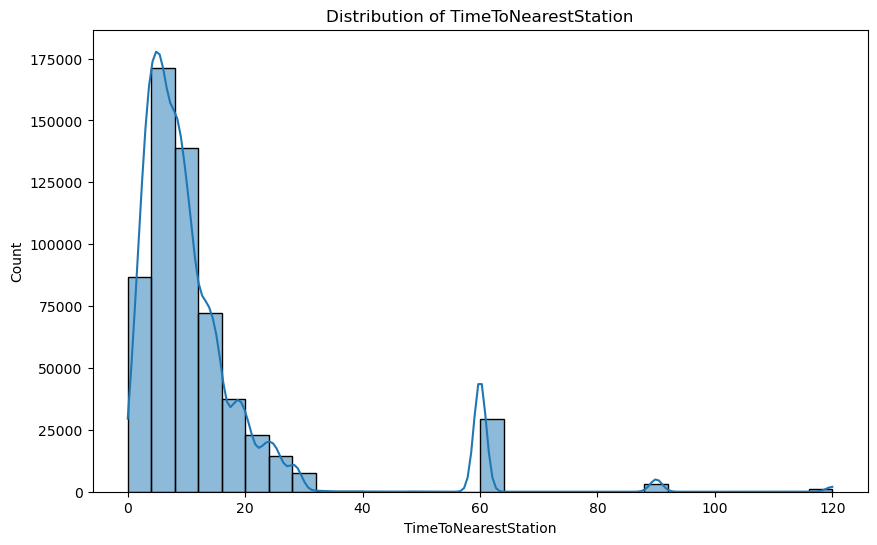

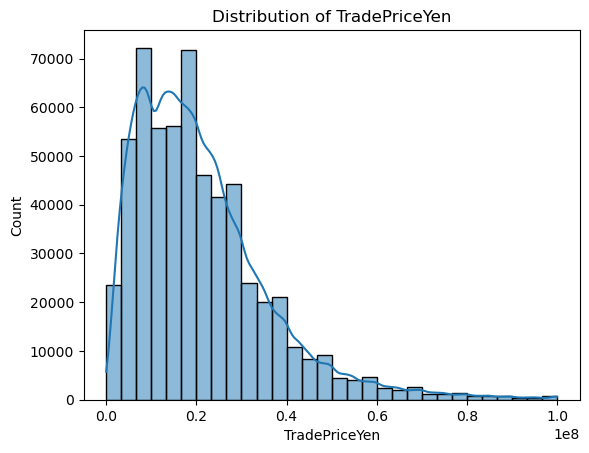

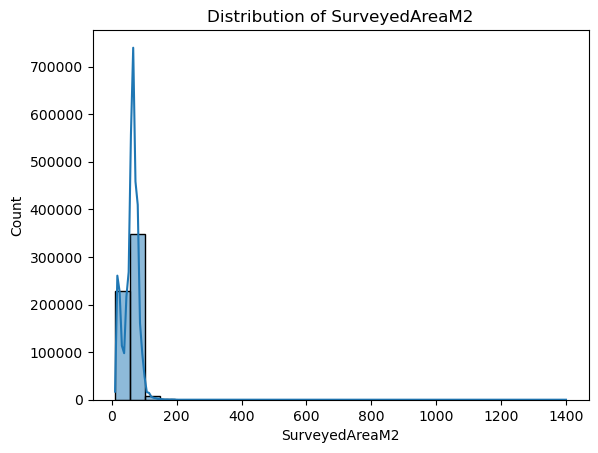

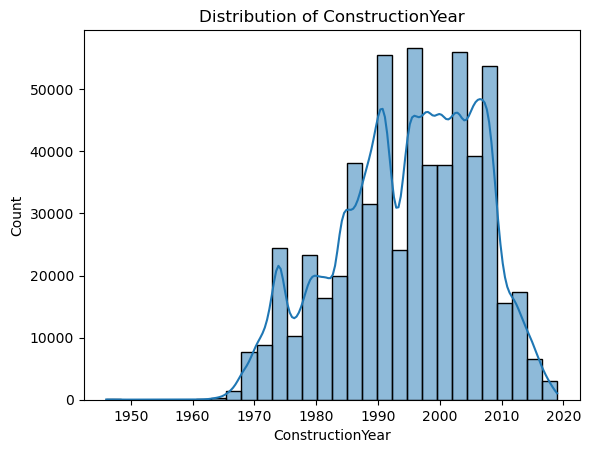

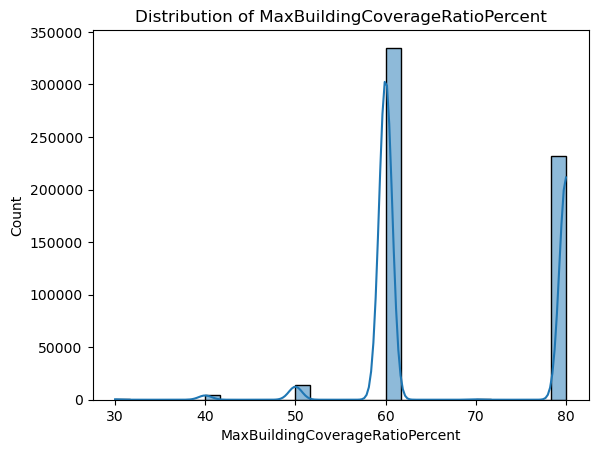

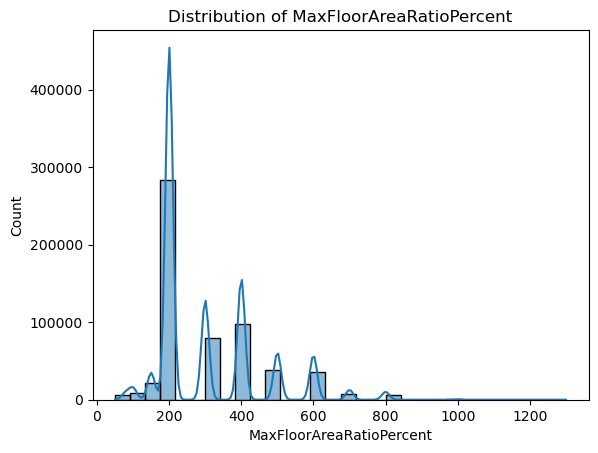

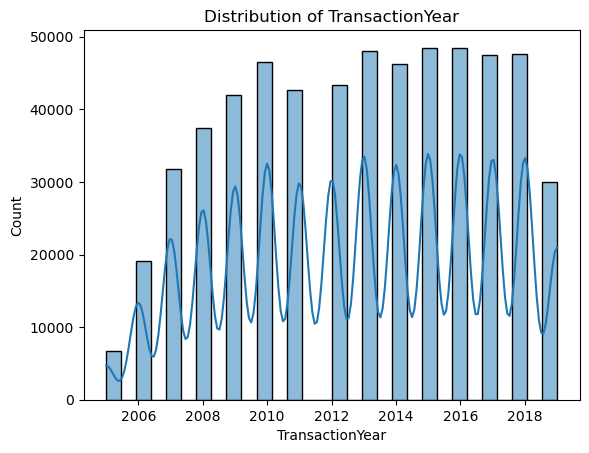

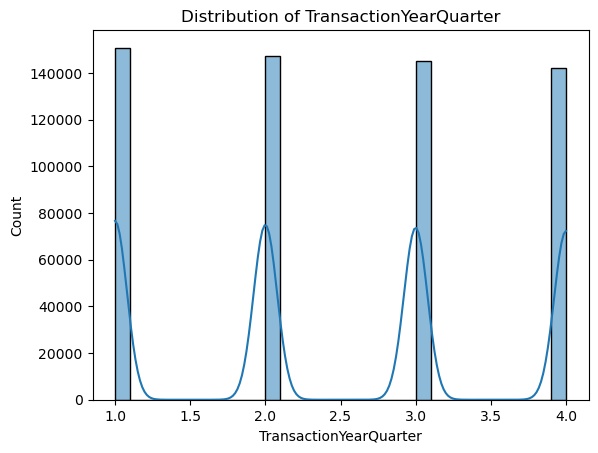

In [103]:
plt.figure(figsize=(10, 6))
for col in numeric_cols:
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Analysis:**
1. Looks like most of the condos take around 30 minutes to the nearest station and there is a spike at 1hr to nearest station,also for 1 1/2 hrs and 3 hrs.
2. There is definitely a right skew in this distribution .There are less expensive houses.
3. Most of the condos have an area below 250m2
4. Construction year of condos ranges from 1965 to 2019 and with the highest being at just before and after 2000.
5. MaxBuildingRatioPercent looks like there are only peaks at 40,50,60 and 80 with 60 being the highest.
6. MaxFloorAreaRatioPercent  mostly falls below 800 and spikes at 200.
7. Most no of condos were bought in 2016 and lowest in 2005
8. Quaterly dstribution of Transactions look  almost uniform

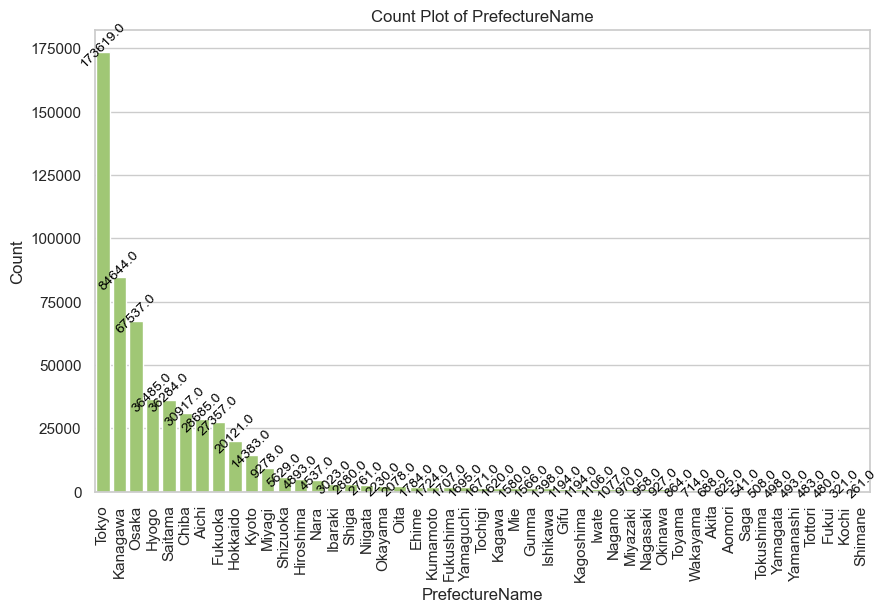

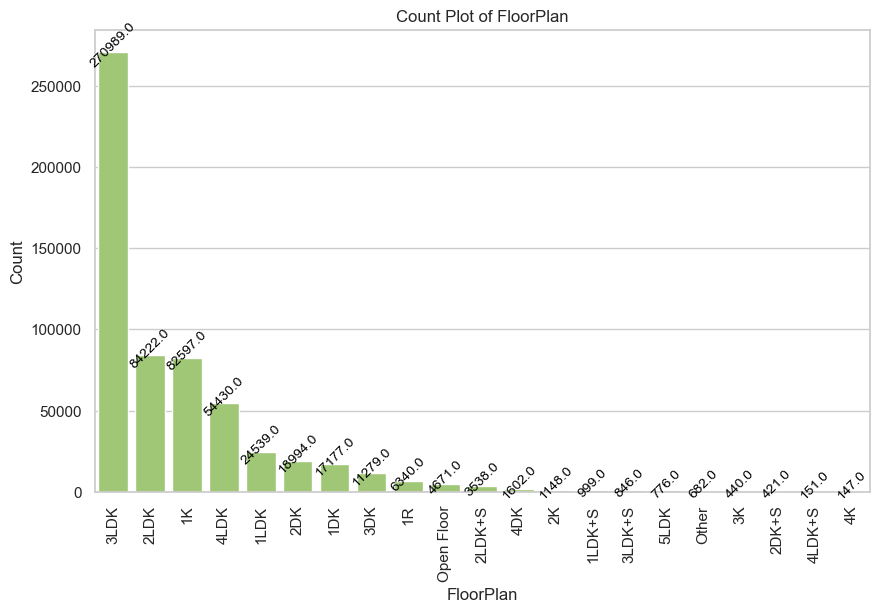

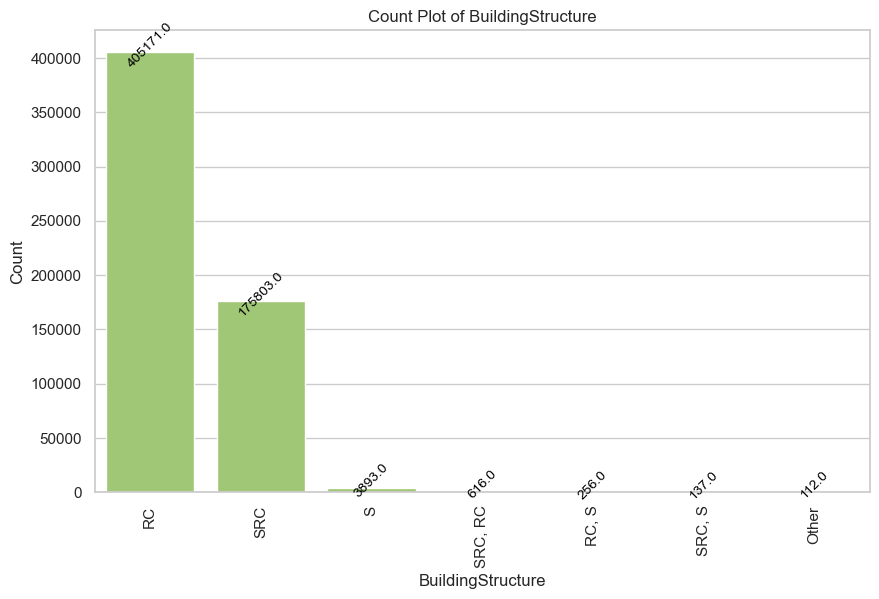

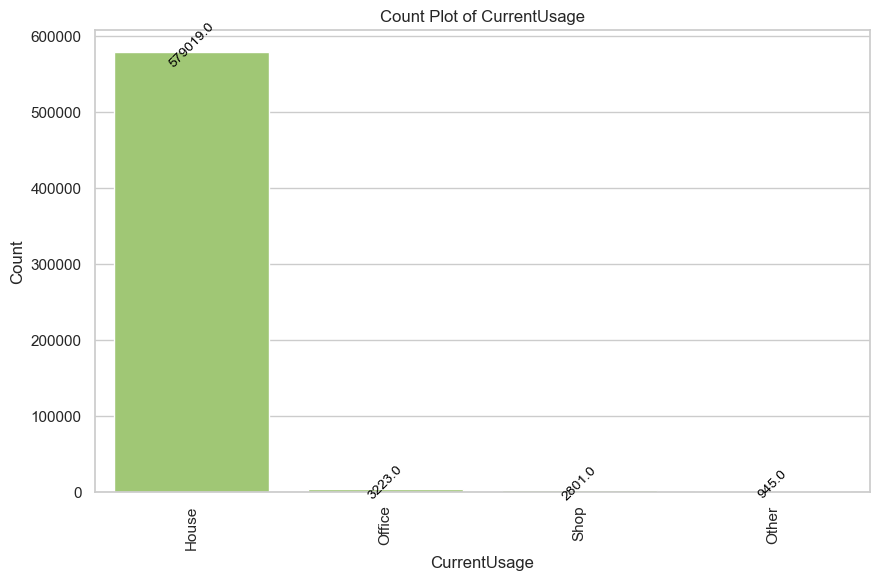

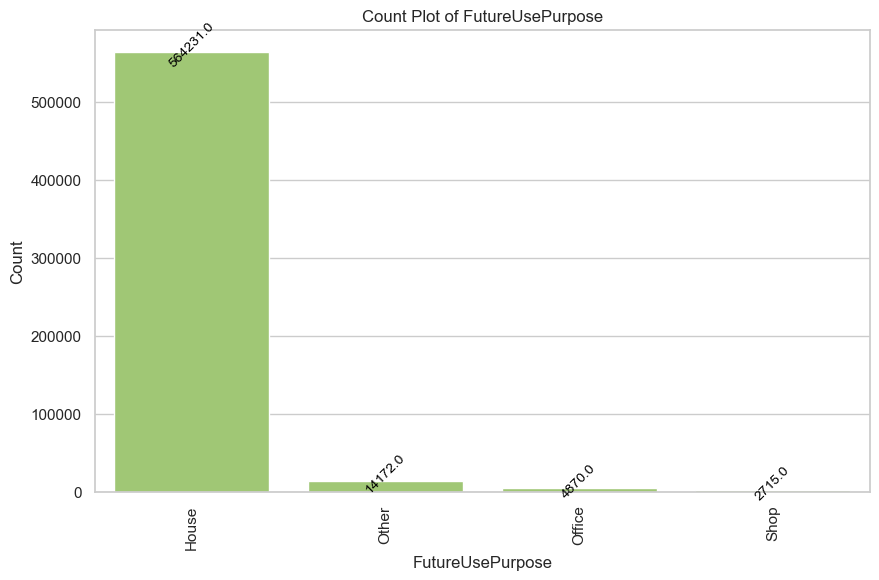

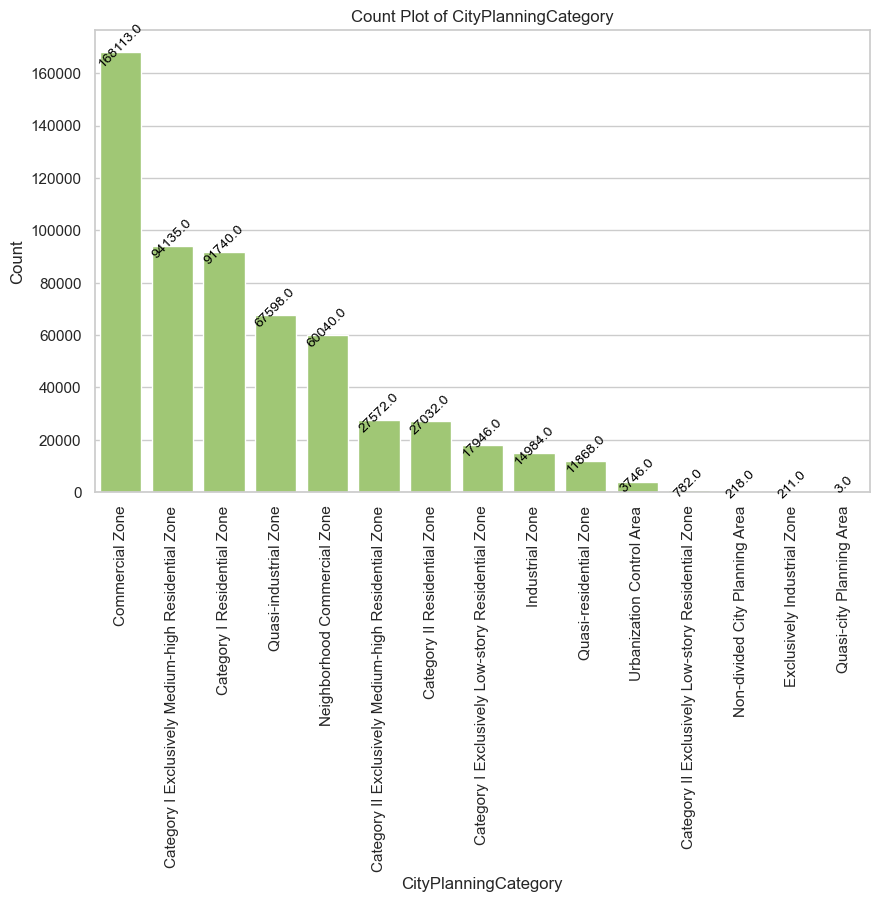

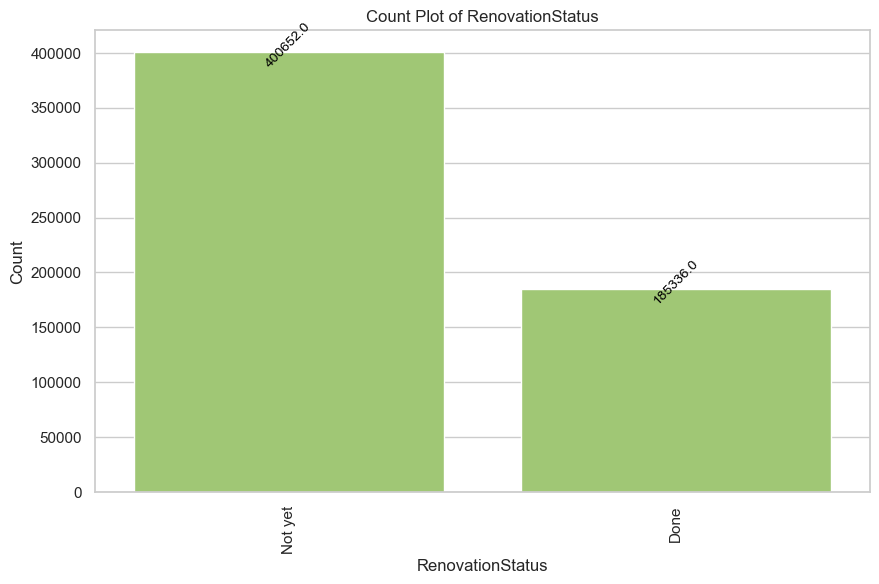

In [104]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,color='#A0D468')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Adding count labels above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=45)
    
    plt.xticks(rotation=90)
    plt.show()

**Analysis:**
1. Highest number of units are in Tokyo and lowest in Shimane prefecture
2. As you can see from the plot most of the structures are 3LDK.2LDK,1K,4LDK,1LDK,2Dk are other most popular floor plans.
3. Most of the units has a Reinforced Concrete structure.
4. Most of the units are currenty used as houses.
5. Here most of the units are to be used as houses with very few as Office, shops, and others.
5. Most of the units are in Commercial Zone areas and with least being in Quasi-city Planning Area
6. Most of the units are not renovated.

In [107]:
numerical_cols=['TimeToNearestStation', 'SurveyedAreaM2',
       'ConstructionYear',
       'MaxBuildingCoverageRatioPercent', 'MaxFloorAreaRatioPercent',
       'TransactionYear', 'TransactionYearQuarter']

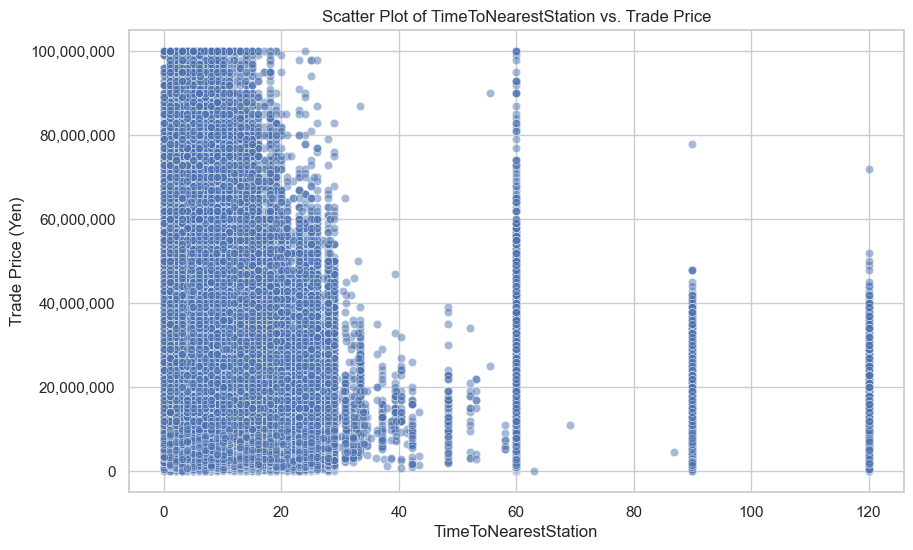

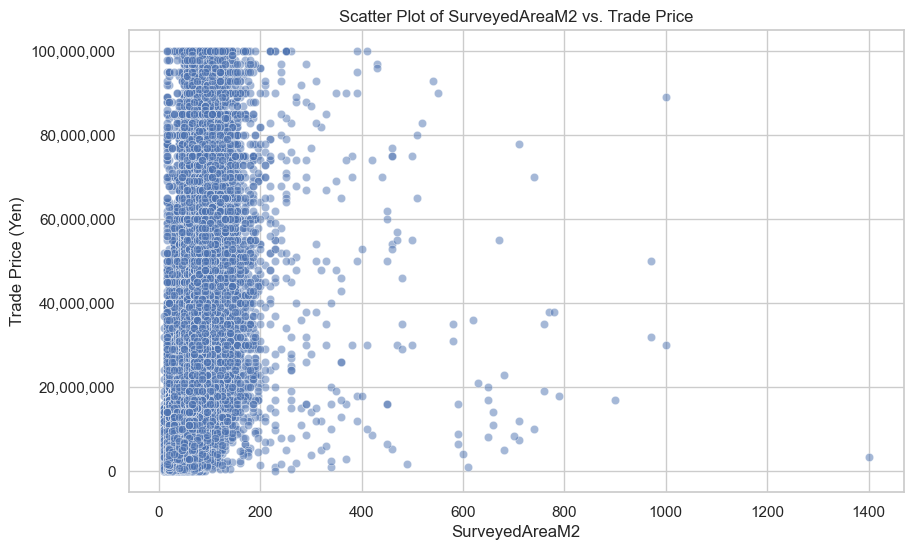

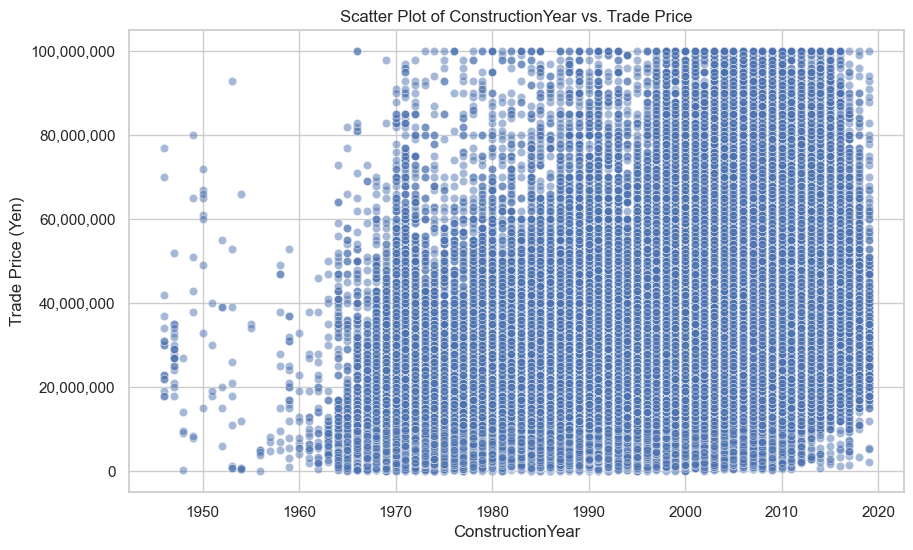

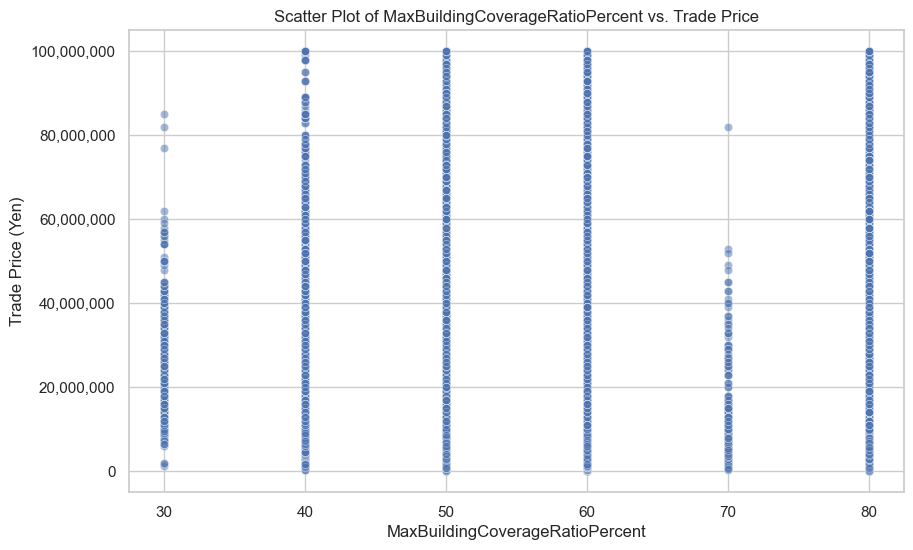

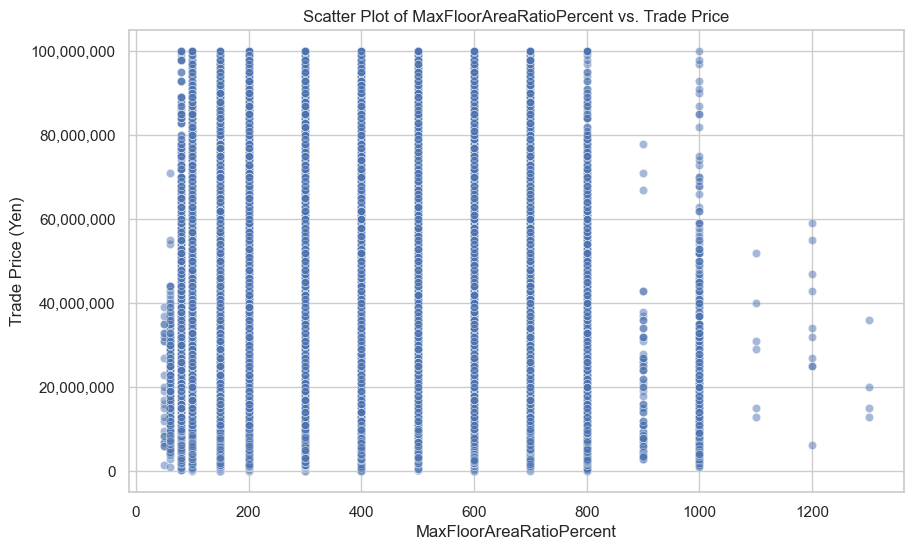

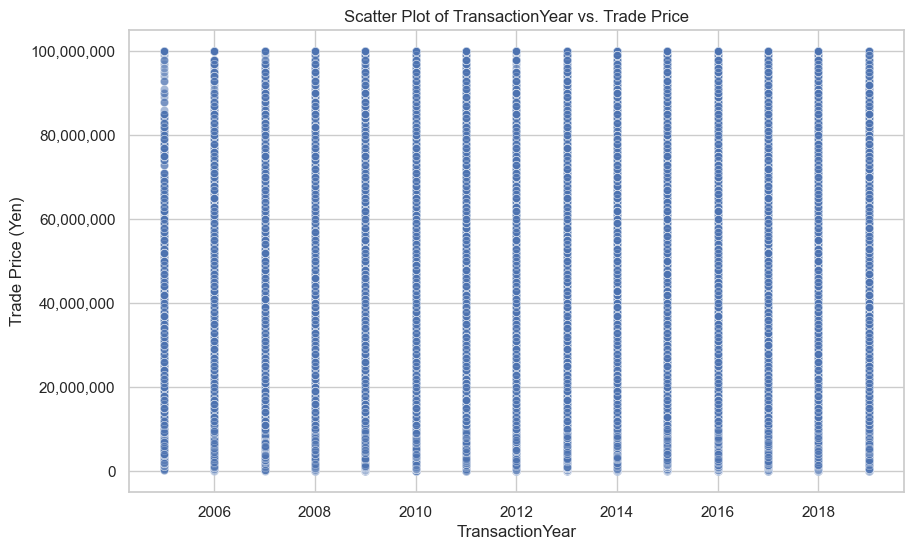

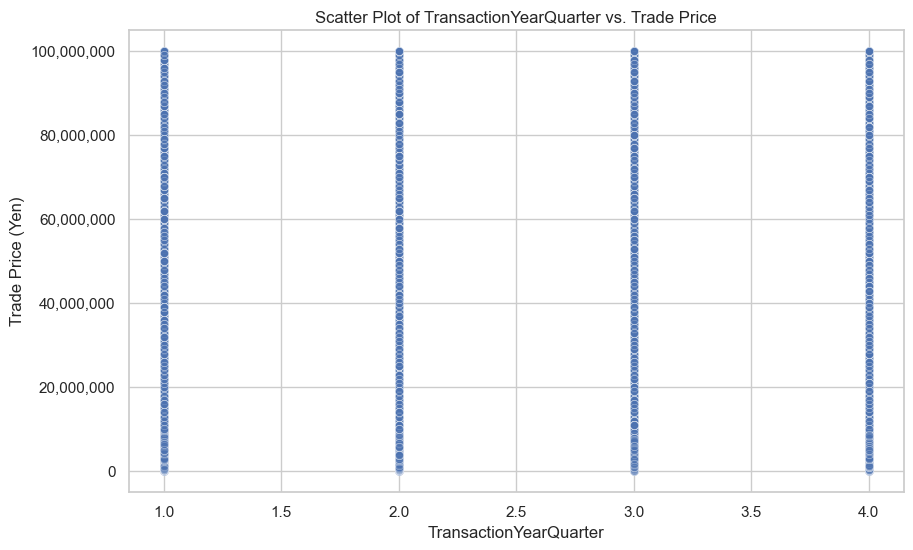

In [109]:
# Defining a function to format tick labels with full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # This formats the label as an integer with commas
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='TradePriceYen', alpha=0.5)
    # Formatting the y-axis tick labels with full numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))
    plt.grid(True)
    #plt.yscale('log')
    plt.title(f'Scatter Plot of {col} vs. Trade Price')
    plt.xlabel(col)
    plt.ylabel('Trade Price (Yen)')
    #plt.savefig(f'scatter_plot_{col}_vs_trade_price.png', bbox_inches='tight')
    plt.show()


These scatter plots are to look at the distribution of the TradePriceYen with the numerical columns.

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


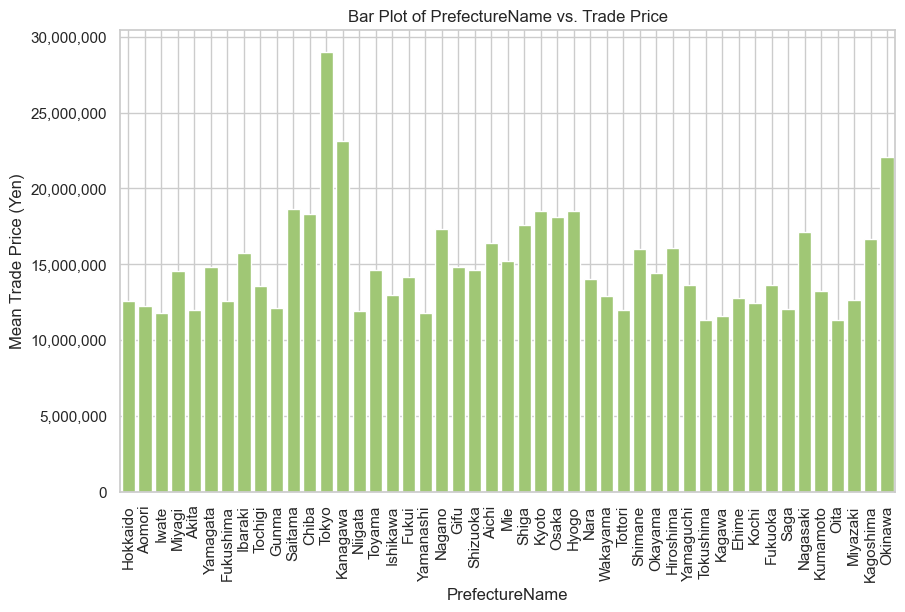

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


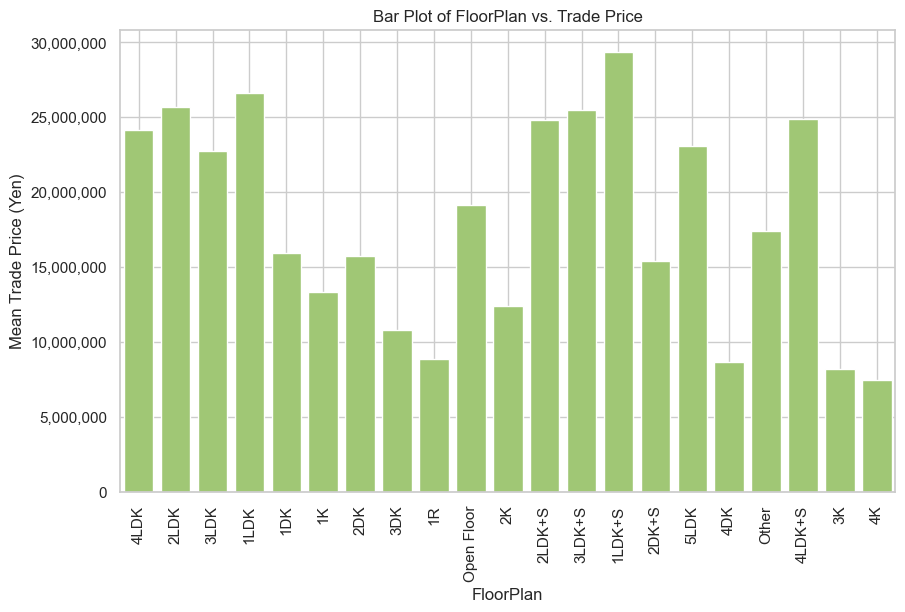

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


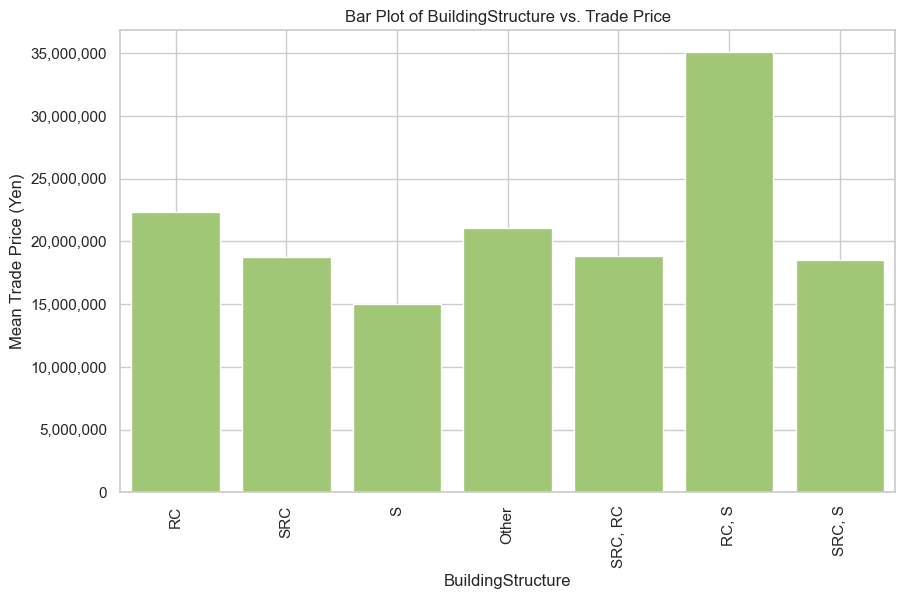

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


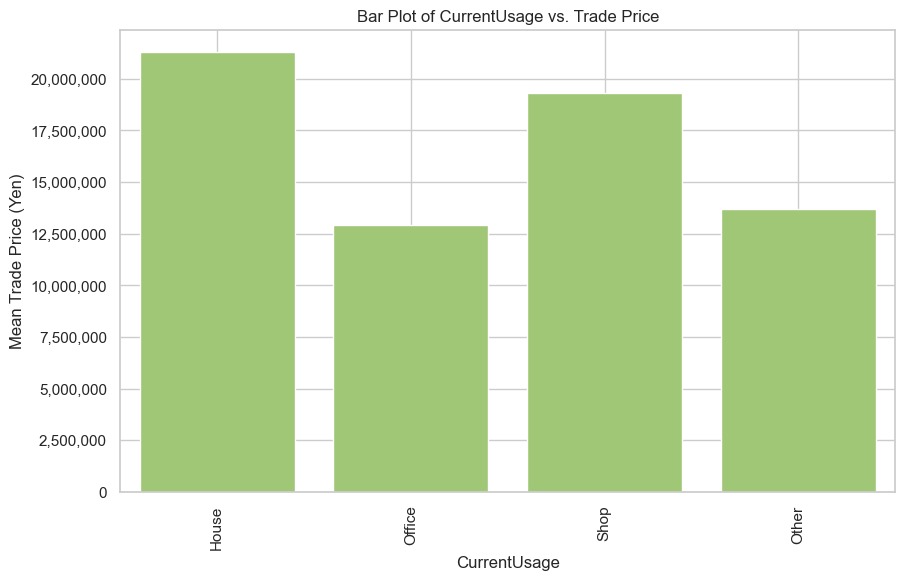

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


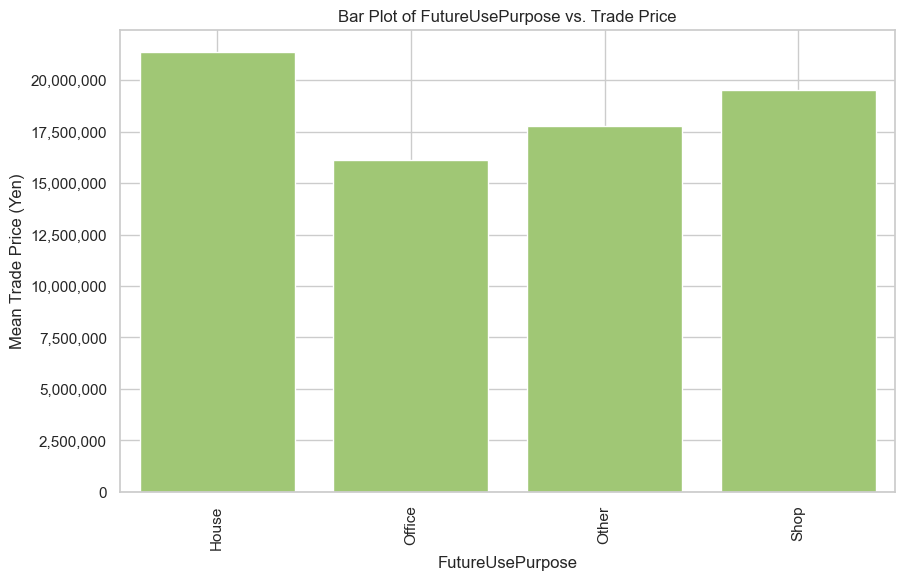

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


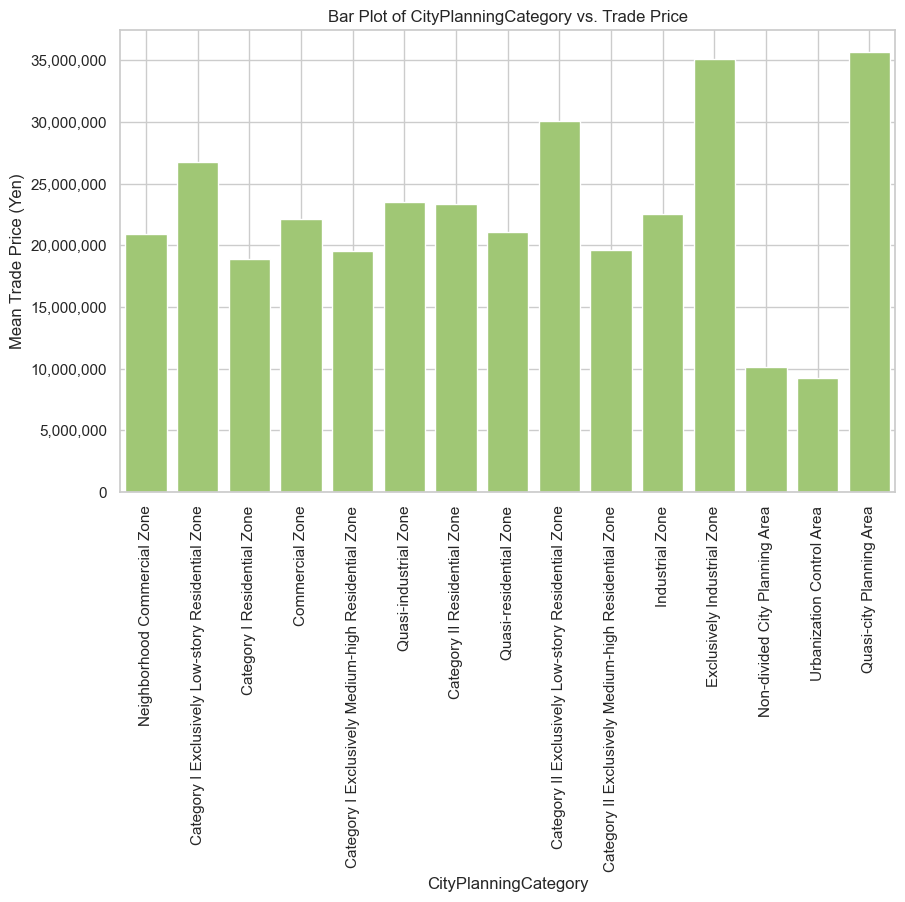

C:\Users\Thekku\AppData\Local\Temp\ipykernel_6368\1673853367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')


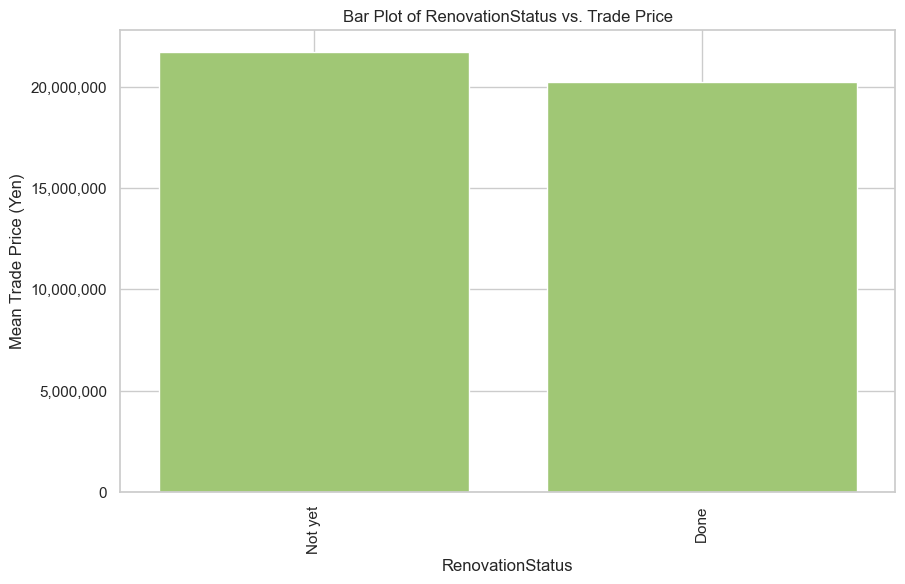

In [110]:
# Defining a function to format tick labels with full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # This formats the label as an integer with commas
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=col, y='TradePriceYen', ci=None,color='#A0D468')    
    # Formatting the y-axis tick labels with full numbers
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))    
    plt.grid(True)  # Add gridlines to the plot    
    plt.title(f'Bar Plot of {col} vs. Trade Price')
    plt.xlabel(col)
    plt.ylabel('Mean Trade Price (Yen)')
    plt.xticks(rotation=90)
    #plt.savefig(f'scatter_plot_{col}_vs_trade_price.png', bbox_inches='tight')
    plt.show()


**Analysis:**

1. As expected Tokyo has the highest prices.
2. The most expensive are 2LDK+S floor plan.
2. Looks like the most expensive are are in reinforced concrete + Steel category.
3. Current Usage Houses and shops are almost the same.
4. Incase of future use mostly everything comes to the same range.
5. Quasi -city planning area has the most expensive prices but from one of the previous plots we saw that it is the least sold. This clearly explains why they are sold less. Outside city planning area has the cheapest prices.
6. Surprisingly there isn't much difference in the prices.

Now to create a correlation matrix let us check the unique values in the columns

Let us create a heatmap for all the correlations

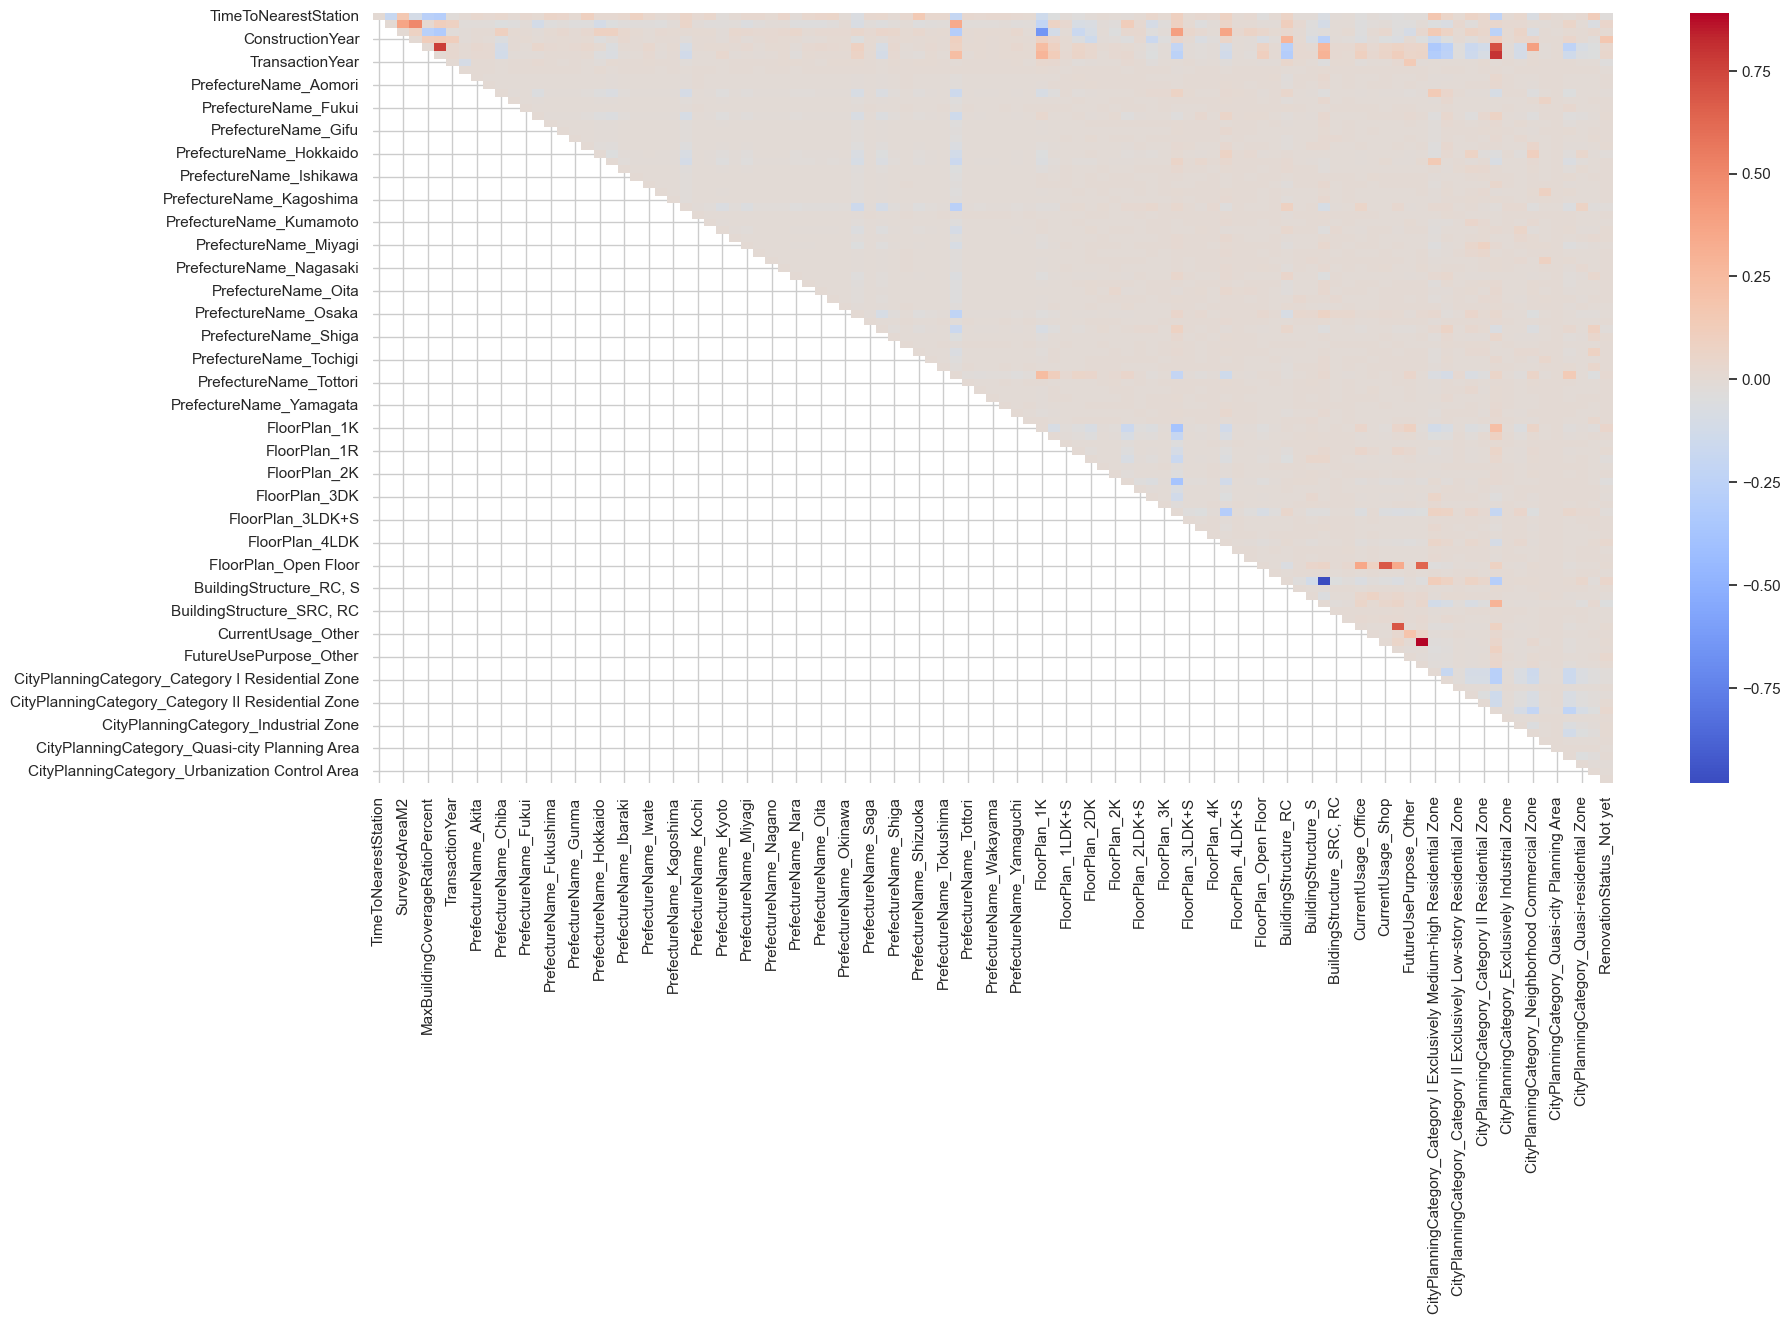

In [111]:
#Converting categorical columns to dummy variables
df_dummies = pd.get_dummies(df, columns=categorical_cols,drop_first=True)
df_dummies.head()
# Correlation matrix
correlation_matrix = df_dummies.corr()
# Diagonal creation
diagonal_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
diagonal_corr_matrix = diagonal_corr_matrix.fillna(0)
# Print the diagonal correlation matrix
#print(diagonal_corr_matrix)
# Heatmap
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(diagonal_corr_matrix, dtype=bool))
sns.heatmap(diagonal_corr_matrix, annot=False, cmap='coolwarm', cbar=True, mask=~mask)
#plt.savefig(f'Correlation matrix.png', bbox_inches='tight')
plt.show()

In [ ]:
sns.pairplot(df[numeric_cols])

Shows a distribution of the numerical columns

Let us look at the highly correlated columns as it is difficult to understand from the correlation map

In [112]:
# Filter for correlations above 0.5
high_corr_pairs = diagonal_corr_matrix[abs(diagonal_corr_matrix) > 0.5]
# Iterate through the high correlation pairs and print them
for column1 in high_corr_pairs.columns:
    for column2 in high_corr_pairs.index:
        correlation = high_corr_pairs[column1][column2]
        if not np.isnan(correlation):
            print(f"Pair: {column1} - {column2}, Correlation: {correlation}")

Pair: ConstructionYear - TradePriceYen, Correlation: 0.5000293687628539
Pair: MaxFloorAreaRatioPercent - MaxBuildingCoverageRatioPercent, Correlation: 0.7700742221499274
Pair: FloorPlan_1K - SurveyedAreaM2, Correlation: -0.6448529497512716
Pair: BuildingStructure_SRC - BuildingStructure_RC, Correlation: -0.9799926094934875
Pair: CurrentUsage_Shop - FloorPlan_Open Floor, Correlation: 0.6810361531425102
Pair: FutureUsePurpose_Office - CurrentUsage_Office, Correlation: 0.6885866180595264
Pair: FutureUsePurpose_Shop - FloorPlan_Open Floor, Correlation: 0.6381889398416132
Pair: FutureUsePurpose_Shop - CurrentUsage_Shop, Correlation: 0.8904562370633711
Pair: CityPlanningCategory_Commercial Zone - MaxBuildingCoverageRatioPercent, Correlation: 0.7122573081691628
Pair: CityPlanningCategory_Commercial Zone - MaxFloorAreaRatioPercent, Correlation: 0.8009004533234697


There are columns which has high collinearity. We have to do feature selection while doing linear regression. For now doing the vanilla baseline modelling with linear regression.

In [113]:
df_dummies.shape

(585988, 101)

# Basic Modelling

In [114]:
df_dummies.columns

Index(['TimeToNearestStation', 'TradePriceYen', 'SurveyedAreaM2',
       'ConstructionYear', 'MaxBuildingCoverageRatioPercent',
       'MaxFloorAreaRatioPercent', 'TransactionYear', 'TransactionYearQuarter',
       'PrefectureName_Akita', 'PrefectureName_Aomori',
       ...
       'CityPlanningCategory_Commercial Zone',
       'CityPlanningCategory_Exclusively Industrial Zone',
       'CityPlanningCategory_Industrial Zone',
       'CityPlanningCategory_Neighborhood Commercial Zone',
       'CityPlanningCategory_Non-divided City Planning Area',
       'CityPlanningCategory_Quasi-city Planning Area',
       'CityPlanningCategory_Quasi-industrial Zone',
       'CityPlanningCategory_Quasi-residential Zone',
       'CityPlanningCategory_Urbanization Control Area',
       'RenovationStatus_Not yet'],
      dtype='object', length=101)

In [115]:
X = df_dummies.drop(columns=["TradePriceYen"])
y = df_dummies['TradePriceYen']

In [116]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train.shape

(468790, 100)

In [118]:
X_test.shape

(117198, 100)

In [119]:
y_train.shape

(468790,)

In [120]:
y_test.shape

(117198,)

In [ ]:
# pca = PCA(n_components=20)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

To now compare the RMSE for linear regresion we need to know the range of our TradePriceYen dependent variable

In [121]:
# Finding the minimum and maximum values in the 'TradePriceYen' column
min_trade_price = df['TradePriceYen'].min()
max_trade_price = df['TradePriceYen'].max()
# Calculating the range
range_trade_price = max_trade_price - min_trade_price
print("Minimum TradePriceYen:", min_trade_price)
print("Maximum TradePriceYen:", max_trade_price)
print("Range of TradePriceYen:", range_trade_price)

Minimum TradePriceYen: 450
Maximum TradePriceYen: 100000000
Range of TradePriceYen: 99999550


# Linear Regression

Let us scale it first

In [123]:
scaler = StandardScaler()
#Fit and transform the train
X_train_scaled = scaler.fit_transform(X_train)
#Tranform the test
X_test_scaled = scaler.transform(X_test)

In [132]:
#linear regression model
model = LinearRegression()
# Training the model on the training data
model.fit(X_train_scaled, y_train)
# Making predictions on the testing set
y_pred_test = model.predict(X_test_scaled)
# Making predictions on the training set
y_pred_train = model.predict(X_train_scaled)
# Evaluating the model using RMSE y_pred_test
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error (RMSE)TEST: {rmse}")
# Evaluating the model using RMSE y_pred_train
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print(f"Root Mean Squared Error (RMSE)TRAIN: {rmse}")

Root Mean Squared Error (RMSE)TEST: 9077217.598805541
Root Mean Squared Error (RMSE)TRAIN: 9105681.84816478


We can delete highly collinear columns to better the model. This is just the base model.

The RMSE on the training set (9106036.330343643) is slightly higher than the RMSE on the test set (9077746.713246938).A slightly higher RMSE on the training set compared to the test set is generally acceptable and not a major cause for concern. It's not unusual for the training RMSE to be slightly higher than the testing RMSE because the model is optimized and fine-tuned to fit the training data as closely as possible. Also,when compared to the range it seems right too.

In [133]:
# Calculating R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R^2) value: {r2}")

R-squared (R^2) value: 0.6332729396153829


R^2 of 0.6332 suggests that the linear regression model explains a substantial portion of the variation in the target variable.

Let us plot the residulas now.

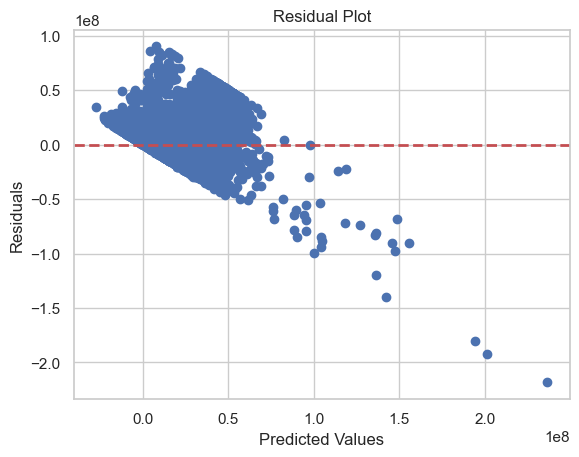

In [134]:
# Residuals
residuals = y_test - y_pred_test
# Scatter plot of predicted values against residuals
plt.scatter(y_pred_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.savefig(f'Residuals.png', bbox_inches='tight')
plt.show()

Plot clearly shows Heteroscedasticity

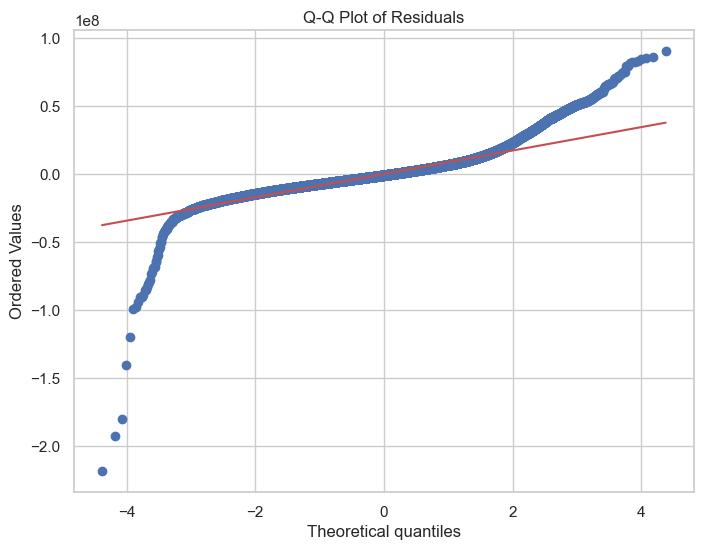

In [135]:
# Creating a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, plot=sns.mpl.pyplot)
plt.title('Q-Q Plot of Residuals')
#plt.savefig(f'Q-Q plot', bbox_inches='tight')
plt.show()

The tails of the distribution of the residuals extend further than what would be expected from a normal distribution. This could indicate the presence of outliers or extreme values in the data that are not well captured by a normal distribution.The S-shape suggests a departure from the normal distribution. The normal distribution has lighter tails, and deviations from linearity in the QQ-plot indicate that the tails of the observed distribution are fatter than the tails of a normal distribution.It shows what is called excess kurtosis (heaviness of tails) compared to a normal distribution. This QQ-plot deviates from the straight line, it's an indication that the residuals do not follow a perfect normal distribution.

The distribution to show fatter tails.

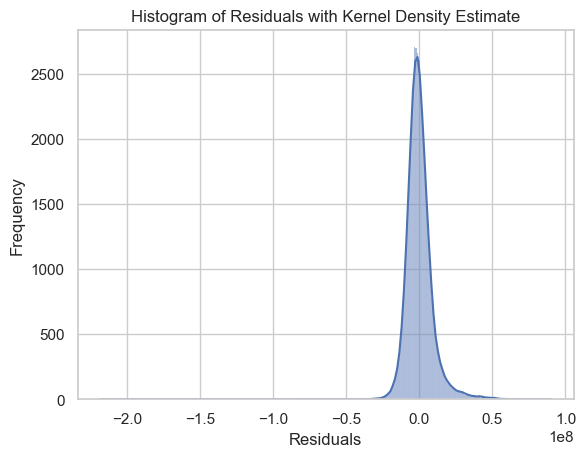

In [136]:
# Plot histogram with kernel density estimate
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals with Kernel Density Estimate')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig(f'Distribution', bbox_inches='tight')
plt.show()

In [137]:
# Accessing the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
# Displaying the coefficients and intercept
print("Intercept:", intercept)
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Intercept: 21218983.961496655
TimeToNearestStation: -1630637.0931
SurveyedAreaM2: 7325155.5687
ConstructionYear: 6044954.0400
MaxBuildingCoverageRatioPercent: -39614.8104
MaxFloorAreaRatioPercent: 2520262.0387
TransactionYear: 758738.0349
TransactionYearQuarter: -31649.4823
PrefectureName_Akita: -77247.4303
PrefectureName_Aomori: -96172.4852
PrefectureName_Chiba: 647581.1274
PrefectureName_Ehime: -133862.3647
PrefectureName_Fukui: -39776.2505
PrefectureName_Fukuoka: 155624.1226
PrefectureName_Fukushima: -90608.6926
PrefectureName_Gifu: -146750.4349
PrefectureName_Gunma: -142198.1558
PrefectureName_Hiroshima: 79628.1223
PrefectureName_Hokkaido: -573706.1571
PrefectureName_Hyogo: 497112.2398
PrefectureName_Ibaraki: -273319.4278
PrefectureName_Ishikawa: -5055.8463
PrefectureName_Iwate: -5788.6987
PrefectureName_Kagawa: -227822.3328
PrefectureName_Kagoshima: 45375.1534
PrefectureName_Kanagawa: 3458100.8887
PrefectureName_Kochi: -55898.9908
PrefectureName_Kumamoto: -45652.7573
PrefectureNam

The coefficients provide information about the direction and magnitude of the relationship between each feature and the trade price.Positive coefficients indicate a positive impact on the trade price, and negative coefficients indicate a negative impact.The magnitude of the coefficient represents the estimated change in the trade price for a one-unit change in the corresponding feature. Regularization techniques (Lasso, Ridge) can be used to penalize large coefficients and prevent overfitting.Cross-Validation can be done to get a more robust estimate of the model performance.

From these we can conclude that Linear Regression is not a good option

Now let us try a basic random forest regressor.

# Random Forest Regressor

In [129]:
# Creating the model
model = RandomForestRegressor()
# Training the model on the training data
model.fit(X_train, y_train)
# Making predictions on the testing set
y_pred_test = model.predict(X_test)
# Making predictions on the training set
y_pred_train = model.predict(X_train)
# Evaluating the model using RMSE for testing data
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Root Mean Squared Error (RMSE) TEST (Random Forest): {rmse}")
# Evaluating the model using RMSE for training data
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print(f"Root Mean Squared Error (RMSE) TRAIN (Random Forest): {rmse}")

Root Mean Squared Error (RMSE) TEST (Random Forest): 6789084.464323814
Root Mean Squared Error (RMSE) TRAIN (Random Forest): 2575431.610105311


In [130]:
# Calculating R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R^2) value: {r2}")

R-squared (R^2) value: 0.794855495200854


Note: This is just the basic model. Hyperparameter tuning has to be done.

In this case, the RMSE for the training set is lower than for the test set, which suggests the model might be overfitting the training data. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of 0.79 means that approximately 79% of the variability in the response variable is explained by the model. This is a moderate level of explained variance. To further evaluate the model's performance should perform tuning of hyperparameters or using additional techniques to address overfitting.

| Model                  | RMSE (Test)       | RMSE (Train)      | R-squared (R^2)   |
|------------------------|-------------------|-------------------|-------------------|
| Linear Regression      | 9,077,746.713     | 9,106,036.330     | 0.6332            |
| Random Forest Regressor| 6,789,084.464     | 2,     575,431.610| 0.7948            |


### Business Implications and Model Performance

**Business Objectives:**
Primary goal is to provide accurate predictions of real estate prices in the Japanese market, supporting both buyers and sellers in making informed decisions.

**Relevance of Metrics:**
The chosen metrics, RMSE and R-squared, directly align with our business objectives. A lower RMSE indicates more precise price predictions, while a higher R-squared signifies a better understanding of the variance in real estate prices.

**Business Impact:**
The model's performance directly impacts the trustworthiness of our pricing predictions. Lower RMSE values enhance the reliability of our platform for users, fostering confidence in decision-making. The R-squared value contributes to our understanding of how well the model explains variations in prices.

**Limitations and Mitigations:**
Presence of heteroscedasticity and non-normality in our current model. Future iterations will involve addressing these issues through advanced statistical techniques and feature engineering.

**Next Steps:**
Next steps include refining the model based on the identified limitations, exploring feature selection strategies to address collinearity, and potentially incorporating more sophisticated modeling approaches to further enhance predictive performance.


# Summary

In this Jupyter notebook, I conducted a analysis of a real estate dataset focused on Japan pre-owned condos and other categories. The analysis included data cleaning, transformation, and visualization. I explored the impact of various features, such as property type and construction year, on real estate prices. The analysis culminated in visualizations and insights aimed at understanding the real estate market in Japan, with a focus on trade prices. Basic modelling with Linear regression and Random forest has been done as a starting point.